In [1]:
#Data Maniplulation
import pandas as pd
import numpy as np
import math

#Data Visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import missingno

#Data Preprocessing
from sklearn.model_selection import train_test_split

#Data Encoders
from sklearn.preprocessing import OrdinalEncoder

#Data Transformations
from sklearn.preprocessing import MinMaxScaler

#Feature Engineering
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import KMeansSMOTE
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

#Model Algorithms
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Model Selection hyperparameter tuning
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline

#Model Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

#Xplainable AI
import shap

#suppress warnings
import warnings
warnings.filterwarnings("ignore")

<h2 style = "text-align:center"> INTRODUCTION </h2>

This is a Comparative experimental design of Chronic Heart Failure Predicting Model. description of data according to source "Myocardial infarction complications Database was collected in the Krasnoyarsk Interdistrict Clinical Hospital No 20 named after I. S. Berzon (Russia) in 1992-1995. Database contains 1700 records (patients), 111 input features and 12 complications/target features. Database contains 7.6% of missing values".

In this work, the target feature that was focused on was Chronic Heart Failure which refers to the persistent inability for the heart to pump blood efficiently, consequently other target features were dropped before EDA commenced. In this work, the structural investigation was carried out, after which some exploratory data analysis was done proceeded by feature engineering of constructing some features from binary categories and selecting the highest scoring features based on Mutual Information to reduce the computational complexity. Furthermore, Model Development was done along with tuning the parameters. 

The performance of the models were compared with random forest and decision tree classifier producing the highest accuracy with Random Forest providing the best trade-off between false negatives and false positives in regards to the model's ability in predicting Chronic Heart Failure cases. Also, the feature importance of Random Forest and shap values were analysed along with the fairness of the model towards the sex feature which happens to be the protected attribute in focus. 

There is a lot of improvement to be done on this work as the major limitation is lack of domain knowledge to properly engineer features. Other limitations were also the scope of models used, since we employed legacy models.

CHEERS!!!

Kessy Okundia. 
D3911279

<h2 style = "text-align:center"> DATA IMPORTATION AND STRUCTURAL INVESTIGATION </h2>

In [2]:
#import data set the index to ID of the patient.
main_data = pd.read_csv("/kaggle/input/myocardial-infarction-complications/Myocardial infarction complications Database.csv")

#set the maximum column displayed to the number of features of the dataframe
pd.set_option("display.max_columns",main_data.shape[1])
main_data.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
print("====data frame shape====")
main_data.shape

====data frame shape====


(1700, 124)

In [5]:
mis_val =[] #list of values for mis val
percentage_miss_val = [] #list to hold percentage of missing values
for feature in main_data.columns:
  m_val = m_val = main_data[feature].isna().sum()
  percentage_miss_val.append(round(((m_val*100)/main_data.shape[0]),1)) #round percentage to 2 decimal place and add to list 
  mis_val.append(main_data[feature].isna().sum()) 
  

#create a dataframe of basic structural information of the dataset
structure= pd.DataFrame([pd.Series(main_data.nunique().T, name="number of unique values"), 
                         pd.Series(main_data.dtypes.T,name="data types"), 
                         pd.Series(mis_val, index=main_data.columns, name="total number of missing values"), 
                         pd.Series(percentage_miss_val, index=main_data.columns, name="percentage of missing values")], 
                        )
                       
structure.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
number of unique values,1700,62,2,4,7,5,3,2,4,2,8,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,30,21,32,20,2,2,2,2,2,2,5,5,5,5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,51,2,40,69,58,4,174,58,9,4,4,4,2,2,2,2,5,4,3,5,4,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,8
data types,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
total number of missing values,0,8,0,4,106,73,51,1628,9,8,248,54,21,21,21,21,21,21,21,18,18,18,18,18,18,18,11,10,10,7,7,7,7,7,1076,1076,267,267,12,15,14,12,12,12,83,80,80,72,1,152,152,152,152,152,152,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,10,10,10,10,10,10,10,369,371,375,375,284,285,1696,125,203,126,16,108,128,657,686,677,9,5,108,131,10,110,131,10,11,13,17,17,16,16,0,0,0,0,0,0,0,0,0,0,0,0
percentage of missing values,0.0,0.5,0.0,0.2,6.2,4.3,3.0,95.8,0.5,0.5,14.6,3.2,1.2,1.2,1.2,1.2,1.2,1.2,1.2,1.1,1.1,1.1,1.1,1.1,1.1,1.1,0.6,0.6,0.6,0.4,0.4,0.4,0.4,0.4,63.3,63.3,15.7,15.7,0.7,0.9,0.8,0.7,0.7,0.7,4.9,4.7,4.7,4.2,0.1,8.9,8.9,8.9,8.9,8.9,8.9,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,6.8,0.6,0.6,0.6,0.6,0.6,0.6,0.6,21.7,21.8,22.1,22.1,16.7,16.8,99.8,7.4,11.9,7.4,0.9,6.4,7.5,38.6,40.4,39.8,0.5,0.3,6.4,7.7,0.6,6.5,7.7,0.6,0.6,0.8,1.0,1.0,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


From structural investigation, we deduce from the total number of unique values for the ID being equal to the total number of observations that therer are no duplicate entries.Furthermore, a high number of missing values in some features can be ascertained, this will be addressed in the section dedicated to missing values and Outliers. Outliers will be determined during analysis of the numeric features. 

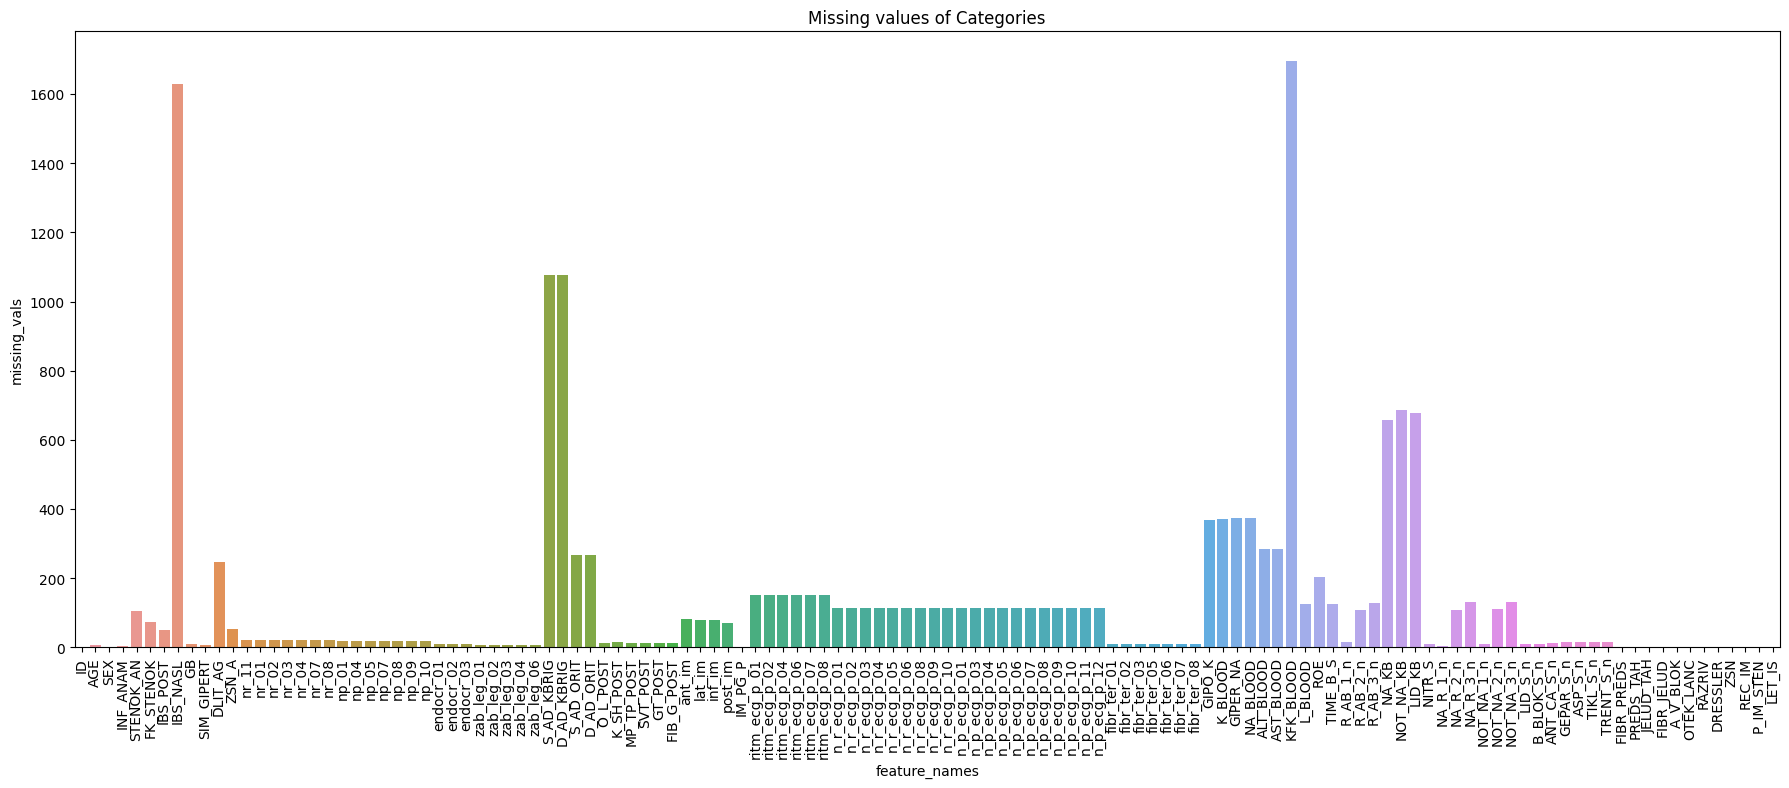

In [6]:
#create a barchart of missing value counts
#convert missing values to data frame
missing_val = pd.DataFrame(main_data.isna().sum()).reset_index()
missing_val = missing_val.rename(columns={"index":"feature_names", 0:"missing_vals"})

#print relative missing and store as an numpy array
fig,ax = plt.subplots(figsize=(22,8))
for feature in main_data.columns:
  m_val = main_data[feature].isna().sum()
  percent_na = round(((m_val*100)/main_data[feature].isna().sum()),1)
sns.barplot(x=missing_val["feature_names"],y=missing_val["missing_vals"],ax=ax)
ax.set_title("Missing values of Categories")
plt.setp(ax.get_xticklabels(),rotation="vertical") #rotate the labels by 45 degress and anchor horizontally to the right
plt.show()


<h2 style = "text-align:center"> EXPLORATORY DATA ANALYSIS </h2>

<h4> Create lists for different feature types </h4> 
<p> To imporve program execution during analysis by not letting the panda implicity selected datatypes. blah blah blah...  </p>

In [3]:
#List of features based on their types
#numerical-continuous
num_cont = ["ID","AGE","S_AD_KBRIG","D_AD_KBRIG", "S_AD_ORIT", "D_AD_ORIT","K_BLOOD","NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", "KFK_BLOOD", 
            "L_BLOOD", "ROE"]

#Binary categorical features
cat_bin = ["SEX","IBS_NASL", "SIM_GIPERT","nr_11","nr_01","nr_02","nr_03","nr_04","nr_07","nr_08","np_01","np_04","np_05","np_07",
            "np_08","np_09","np_10","endocr_01","endocr_02","endocr_03","zab_leg_01","zab_leg_02","zab_leg_03","zab_leg_04","zab_leg_06",
            "O_L_POST","K_SH_POST","MP_TP_POST","SVT_POST","GT_POST","FIB_G_POST","IM_PG_P","ritm_ecg_p_01","ritm_ecg_p_02","ritm_ecg_p_04",
            "ritm_ecg_p_06","ritm_ecg_p_07","ritm_ecg_p_08","n_r_ecg_p_01","n_r_ecg_p_02","n_r_ecg_p_03","n_r_ecg_p_04","n_r_ecg_p_05",
            "n_r_ecg_p_06","n_r_ecg_p_08","n_r_ecg_p_09","n_r_ecg_p_10","n_p_ecg_p_01","n_p_ecg_p_03","n_p_ecg_p_04","n_p_ecg_p_05",
            "n_p_ecg_p_06","n_p_ecg_p_07","n_p_ecg_p_08","n_p_ecg_p_09","n_p_ecg_p_10","n_p_ecg_p_11","n_p_ecg_p_12","fibr_ter_01","fibr_ter_02",
            "fibr_ter_03","fibr_ter_05","fibr_ter_06","fibr_ter_07","fibr_ter_08","GIPO_K","GIPER_NA","NA_KB","NOT_NA_KB","LID_KB","NITR_S","LID_S_n",
          "B_BLOK_S_n","ANT_CA_S_n","GEPAR_S_n","ASP_S_n","TIKL_S_n","TRENT_S_n"]

#Ordinal Categorical Features
cat_ord= ["INF_ANAM","STENOK_AN","FK_STENOK","IBS_POST","GB","DLIT_AG","ZSN_A","ant_im","lat_im","inf_im","post_im","TIME_B_S","R_AB_1_n",
         "R_AB_2_n","R_AB_3_n","NA_R_1_n","NA_R_2_n","NA_R_3_n","NOT_NA_1_n","NOT_NA_2_n","NOT_NA_3_n"]

#Target features 
cat_targ = ["FIBR_PREDS","PREDS_TAH","JELUD_TAH","FIBR_JELUD","A_V_BLOK",
           "OTEK_LANC","RAZRIV","DRESSLER","ZSN","REC_IM","P_IM_STEN","LET_IS"]


In [8]:
#compare total sum of the column lists
total_columns = len(num_cont)+len(cat_bin)+len(cat_ord)+len(cat_targ)
print(total_columns)
print(main_data.shape)

124
(1700, 124)


<h4> Drop other target features except ZSN(Chronic Heart Disease)</h4>

In [5]:
#drop other target features 
columns_to_drop=cat_targ
columns_to_drop.remove("ZSN")
main_data_2 = main_data.drop(columns=columns_to_drop)

main_data_2.head()

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,NaN,NaN,NaN,8.0,16.0,4.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,NaN,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,100.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,NaN,10.8,NaN,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,NaN,NaN,NaN,2.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,100.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,NaN,8.3,NaN,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


<h4> Distribution and Statistical Description of Numerical features</h4> 

In [10]:
#Create DataFrame from numerical feature descriptions
num_stats = main_data[num_cont].describe().T #Transpose the table so we have column names as index and the stats as the columns

#get the interquartile range from the difference of 75% and 25%
num_stats["iqr"] = num_stats["75%"]-num_stats["25%"]

#get the normal range, max-min
num_stats["range"] = num_stats["max"]-num_stats["min"]

#rename the 50% to median
num_stats= num_stats.rename(columns={"50%":"median"})
num_stats.head(15)

,count,mean,std,min,25%,median,75%,max,iqr,range
ID,1700.0,850.500000,490.892045,1.00,425.75,850.50,1275.25,1700.00,849.50,1699.00
AGE,1692.0,61.856974,11.259936,26.00,54.00,63.00,70.00,92.00,16.00,66.00
S_AD_KBRIG,624.0,136.907051,34.997835,0.00,120.00,140.00,160.00,260.00,40.00,260.00
D_AD_KBRIG,624.0,81.394231,19.745045,0.00,70.00,80.00,90.00,190.00,20.00,190.00
S_AD_ORIT,1433.0,134.588276,31.348388,0.00,120.00,130.00,150.00,260.00,30.00,260.00
D_AD_ORIT,1433.0,82.749477,18.321063,0.00,80.00,80.00,90.00,190.00,10.00,190.00
K_BLOOD,1329.0,4.191422,0.754076,2.30,3.70,4.10,4.60,8.20,0.90,5.90
NA_BLOOD,1325.0,136.550943,6.512120,117.00,133.00,136.00,140.00,169.00,7.00,52.00
ALT_BLOOD,1416.0,0.481455,0.387261,0.03,0.23,0.38,0.61,3.00,0.38,2.97
AST_BLOOD,1415.0,0.263717,0.201802,0.04,0.15,0.22,0.33,2.15,0.18,2.11


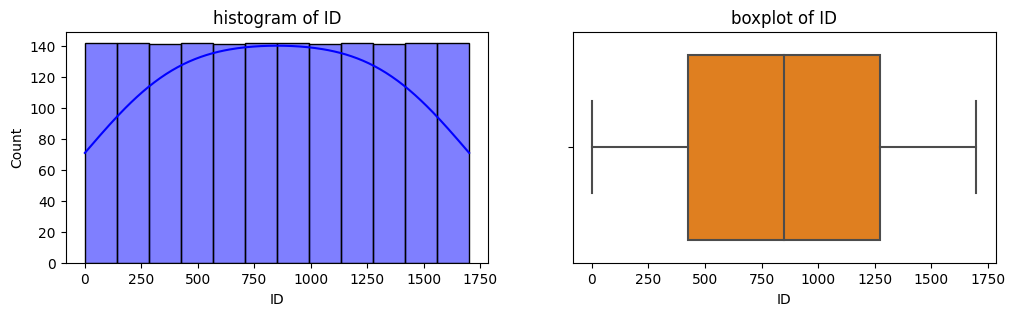

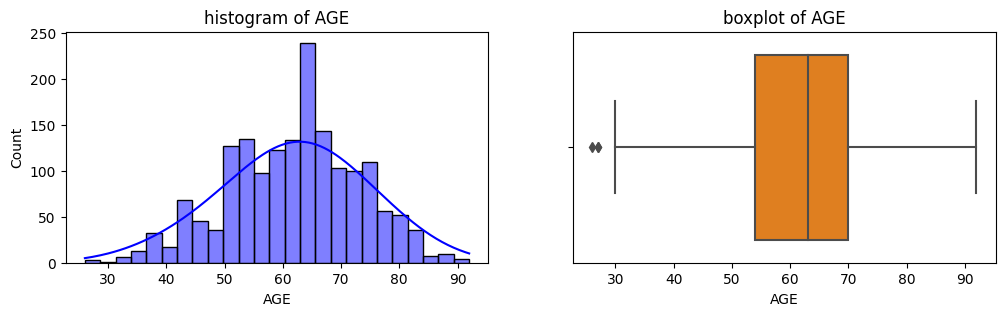

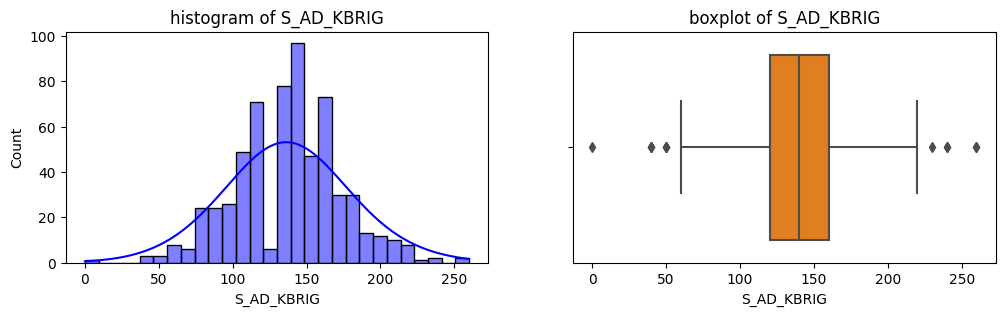

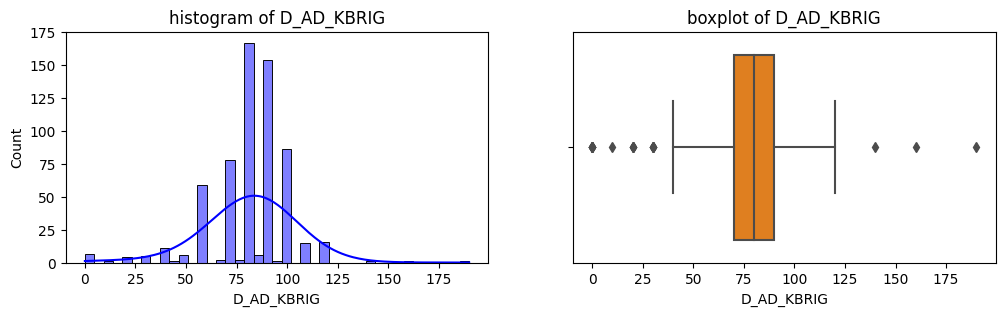

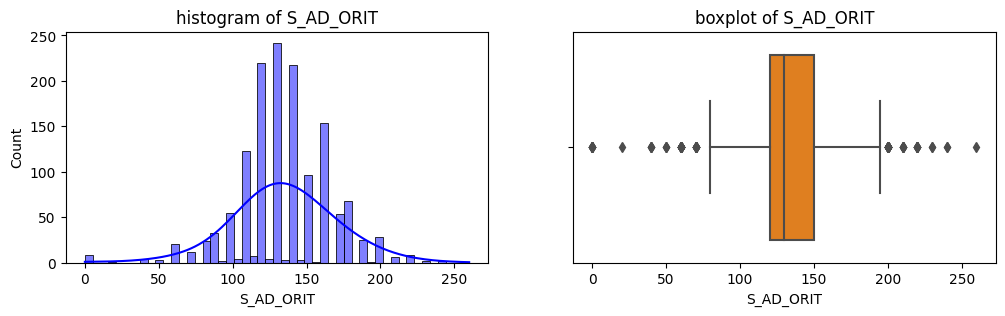

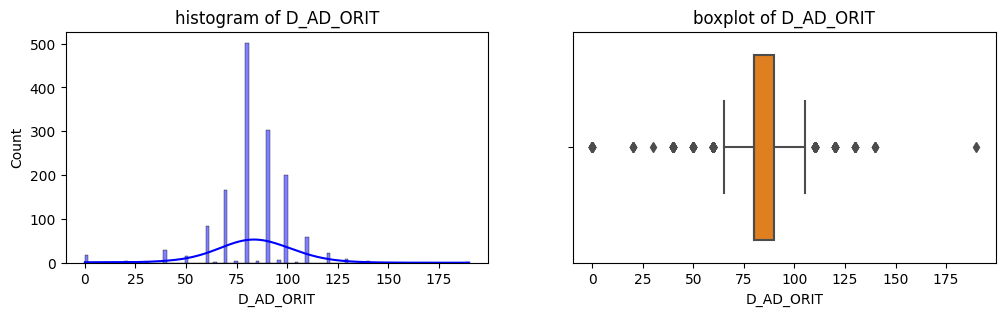

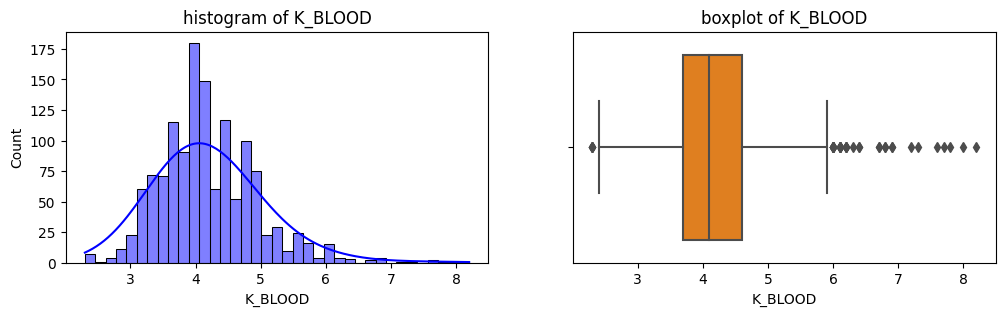

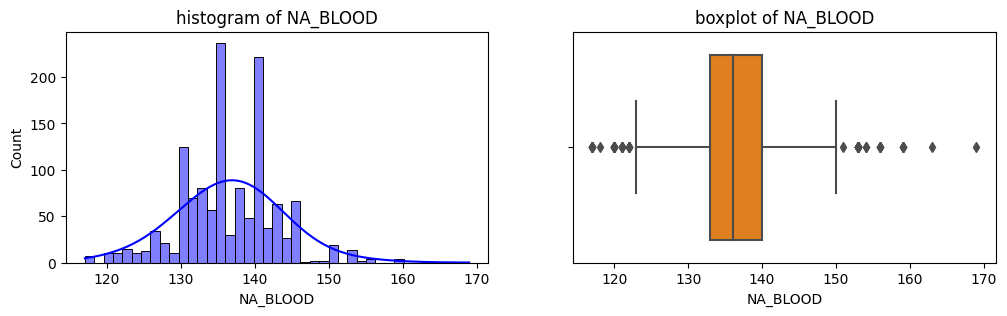

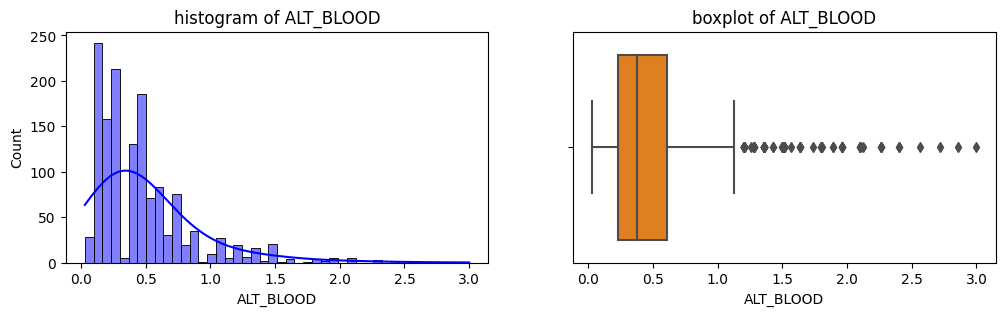

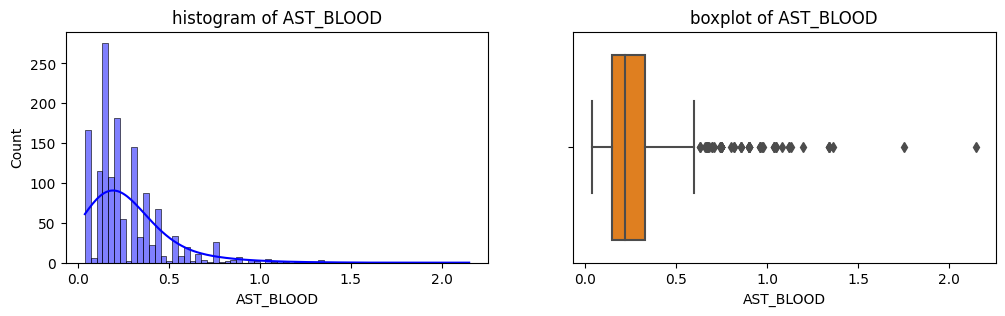

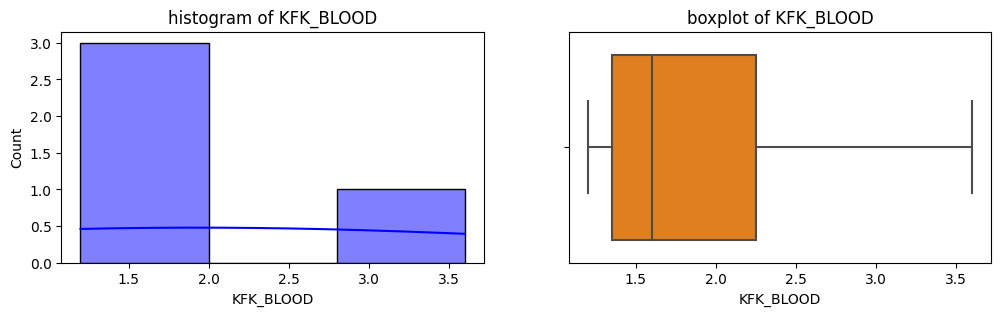

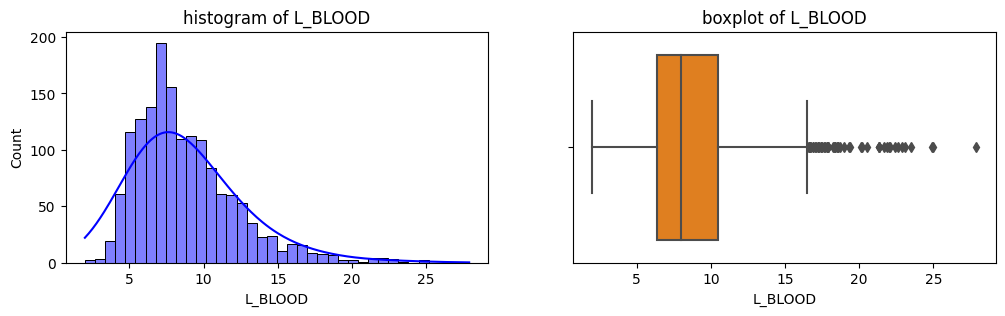

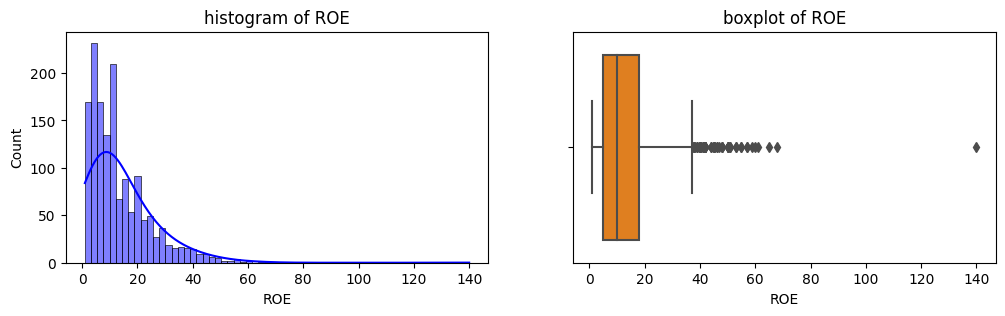

In [11]:
#hostogram and boxplots
for feature in num_cont:
  fig, axs = plt.subplots(1,2,figsize=(12,3))
  #histogram
  sns.histplot(main_data[feature], kde=True, kde_kws ={"bw_adjust":3}, ax=axs[0], color="Blue")
  axs[0].set_title(f"histogram of {feature}")
  #boxplot
  sns.boxplot(x=main_data[feature],ax=axs[1],palette="Set1_r")
  axs[1].set_title(f"boxplot of {feature}")
  plt.show()

<h4> Distribution of Ordinal Categorical features</h4> 

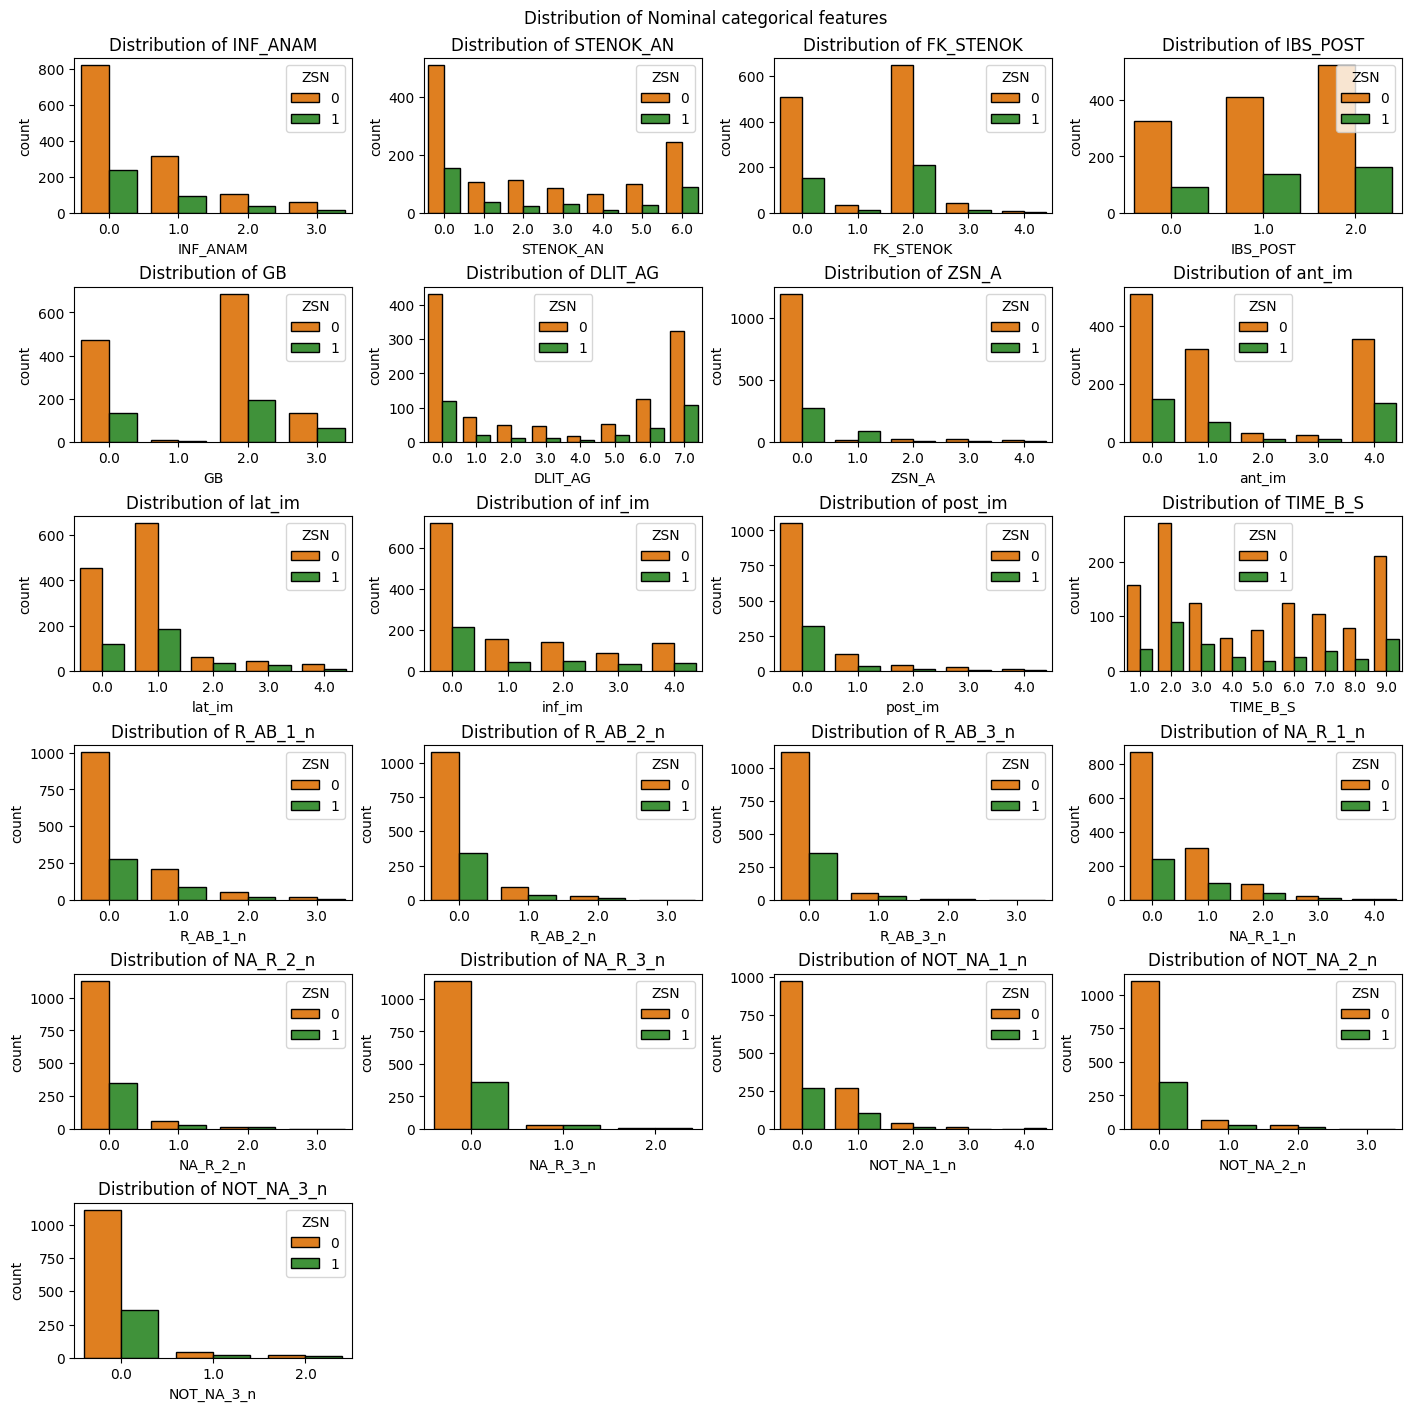

In [12]:
#Nominal Categorical Features Distribution
fig = plt.figure(layout="constrained", figsize=(14,14))
gs = GridSpec(6,4,figure=fig) 

plot=0 #to select the feature name in the list of categorical features
for i in range(0,6): #to generate column numbers
  for j in range(0,4): #row generate row numbers
    if plot < 21:
      ax_=fig.add_subplot(gs[i,j]) #assign axes object at the current row and column
      sns.countplot(x=main_data_2.loc[:,cat_ord[plot]],hue=main_data_2["ZSN"],edgecolor="black", palette="Paired_r",ax=ax_)
      ax_.set_title(f"Distribution of {cat_ord[plot]}")
      plot = plot+1 #increase count of plot
fig.suptitle("Distribution of Nominal categorical features") #figure title
plt.show()

<h4>Distribution of age group and sex in relation to heart disease</h4>

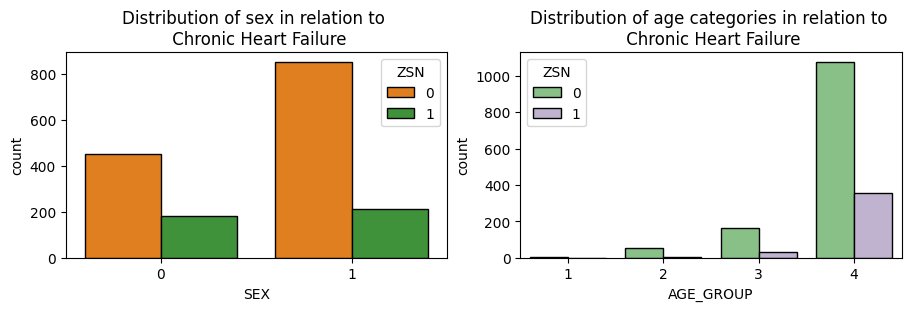

In [6]:

#Distribution of sex in relation to heart disease
fig, axs = plt.subplots(1,2, figsize=(9,3), layout="constrained")

sns.countplot(x=main_data_2["SEX"],hue=main_data_2["ZSN"],edgecolor="black", palette="Paired_r",ax=axs[0])
axs[0].set_title("Distribution of sex in relation to \n Chronic Heart Failure")

#Distribution of age categories in relation to heart disease
age_group_bins = pd.cut(main_data_2["AGE"], bins=[20,30,40,50,100], labels=[1,2,3,4])
age_group_series = pd.Series(age_group_bins, name="AGE_GROUP",index=main_data_2.index)
sns.countplot(x=age_group_series,hue=main_data_2["ZSN"],edgecolor="black", palette="Accent", ax=axs[1])
axs[1].set_title("Distribution of age categories in relation to \n Chronic Heart Failure")


plt.show()

In [8]:
#Create seperate dataframes of sex class with their respective age group 
age_sex = pd.DataFrame(main_data_2["SEX"])
age_sex = age_sex.join(age_group_series)
age_sex = age_sex.join(main_data_2["ZSN"])
fem_age = age_sex[age_sex["SEX"]==0]
male_age = age_sex[age_sex["SEX"]==1]


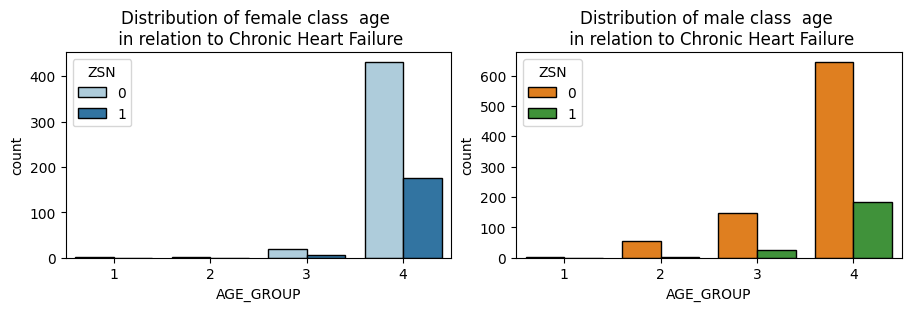

In [9]:
#Distribution of the different sex class in relation to age group and chronic heart disease
fig, axs = plt.subplots(1,2, figsize=(9,3), layout="constrained")

sns.countplot(x=fem_age["AGE_GROUP"],hue=fem_age["ZSN"],edgecolor="black", palette="Paired",ax=axs[0])
axs[0].set_title("Distribution of female class  age \n in relation to Chronic Heart Failure")

sns.countplot(x=male_age["AGE_GROUP"],hue=male_age["ZSN"],edgecolor="black", palette="Paired_r",ax=axs[1])
axs[1].set_title("Distribution of male class  age \n in relation to Chronic Heart Failure")
plt.show()

<h4>HANDLING MISSING VALUES AND INVESTIGATING OUTLIERS</h4>

Impute missing values

In [16]:
#retries column names of missing values
miss_val_greater_50=[]
miss_val_less_50 =[]
for feature in main_data_2.columns:
  m_val = m_val = main_data_2[feature].isna().sum()
  p_m_val = round(((m_val*100)/main_data_2.shape[0]),1) #round percentage to 2 decimal place and add to list 
  if p_m_val >= 50:
    miss_val_greater_50.append(feature) 
  elif p_m_val > 0 and p_m_val < 50:
    miss_val_less_50.append(feature)
    


In [17]:
main_data_3 = main_data_2.drop(columns=miss_val_greater_50)
for feature in miss_val_less_50:
    for feature1 in num_cont:
        if feature == feature1:
            main_data_3[feature] = main_data_3[feature].fillna(main_data_3[feature].median())
        else:
            main_data_3[feature] = main_data_3[feature].fillna(main_data_3[feature].mode()[0])
main_data_3.isna().sum()

AGE          0
SEX          0
INF_ANAM     0
STENOK_AN    0
FK_STENOK    0
            ..
GEPAR_S_n    0
ASP_S_n      0
TIKL_S_n     0
TRENT_S_n    0
ZSN          0
Length: 108, dtype: int64

In [18]:
main_data_3.sort_values(by="ROE", ascending=False)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
270,66.0,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,140.0,0.15,0.15,8.3,140.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0
163,76.0,0,1.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0,128.0,0.15,0.22,6.8,68.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
20,70.0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,130.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,132.0,0.15,0.15,9.7,65.0,9.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1020,76.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,130.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,0.0,130.0,1.80,0.90,7.9,61.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1504,74.0,0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,80.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,142.0,0.15,0.22,7.0,60.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,70.0,0,0.0,3.0,2.0,1.0,2.0,0.0,7.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

The observation in the ROE colum that is the cause of the outlier will be dropped because of the great difference in value. 

The observations corresponding to 0 in S_AD_ORIT (corresponding systolic pressure of the patient measured in the intensive care unit) will be dropped, because this corresponds to the patients dying from other causes other causes as of time observations were taken. the sorted original table containing the lethal outcomes and scatter plot verifies this. Additionally, their value is insignificant. 

In [19]:
#delete the outliers corresponding to zero in the Systolic Blood pressure feature
main_data_3 = main_data_3.drop(index=np.where(main_data_3["S_AD_ORIT"]==0)[0], errors="ignore")
main_data_3.sort_values(by="S_AD_ORIT")

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
1596,66.0,0,3.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,136.0,0.15,0.15,6.9,5.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1510,68.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,136.0,0.15,0.15,6.9,5.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1575,70.0,1,1.0,0.0,2.0,2.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,136.0,0.15,0.15,6.9,5.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
1577,54.0,1,1.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,136.0,0.15,0.15,10.2,5.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1668,76.0,1,1.0,6.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,40.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0,128.0,1.89,1.08,12.1,4.0,6.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,61.0,0,0.0,3.0,2.0,2.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [20]:
main_data_3 = main_data_3.drop(index=np.where(main_data_3["ROE"]==140)[0], errors="ignore")
main_data_3.sort_values(by="ROE", ascending=False)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
163,76.0,0,1.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.8,0.0,128.0,0.15,0.22,6.8,68.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
20,70.0,0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,130.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,132.0,0.15,0.15,9.7,65.0,9.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0
1020,76.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,130.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.1,0.0,130.0,1.80,0.90,7.9,61.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1504,74.0,0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,80.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,142.0,0.15,0.22,7.0,60.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
994,61.0,0,2.0,2.0,2.0,1.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,140.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.2,0.0,139.0,0.15,0.07,6.9,59.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,57.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,140.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

<h4>CHECKING CORRELATION OF FEATURES</h4>

Correlation of all numeric features

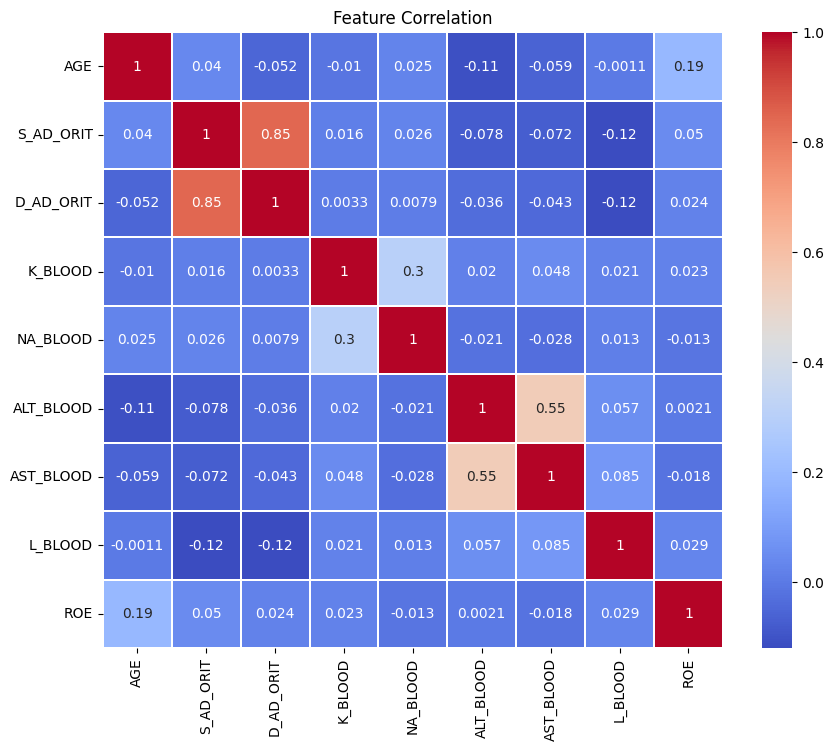

In [21]:
#Correlation of Numerical Features. 
corr_num = main_data_3[["AGE","S_AD_ORIT","D_AD_ORIT","K_BLOOD","NA_BLOOD", "ALT_BLOOD", "AST_BLOOD", 
            "L_BLOOD", "ROE"]].corr()

#plot heatmap of correlation
fig,ax = plt.subplots(figsize = (10,8))
sns.heatmap(corr_num, annot=True, cmap="coolwarm", ax=ax,linewidth=0.1, linecolor="White")
ax.set_title("Feature Correlation")
plt.show()

The systolic blood pressure and diastolic blood pressure have the highest inter correlation between each other

<h2 style = "text-align:center"> FEATURE ENGINEERING </h2>

Creating new features from related binary features like the ECG.

In [78]:
#Split the target and independent features into new data set

#copy to new dataframe
X = main_data_3.copy()
Y = X.pop("ZSN")

#ecg related binary features
ecg_features_list = ["ritm_ecg_p_01","ritm_ecg_p_02","ritm_ecg_p_04",
            "ritm_ecg_p_06","ritm_ecg_p_07","ritm_ecg_p_08","n_r_ecg_p_01","n_r_ecg_p_02","n_r_ecg_p_03","n_r_ecg_p_04","n_r_ecg_p_05",
            "n_r_ecg_p_06","n_r_ecg_p_08","n_r_ecg_p_09","n_r_ecg_p_10","n_p_ecg_p_01","n_p_ecg_p_03","n_p_ecg_p_04","n_p_ecg_p_05",
            "n_p_ecg_p_06","n_p_ecg_p_07","n_p_ecg_p_08","n_p_ecg_p_09","n_p_ecg_p_10","n_p_ecg_p_11","n_p_ecg_p_12",]

#heart block related history
heart_block_features = ["np_01","np_04","np_05","np_07","np_08","np_09","np_10"]

#Fibrinolytic therapy related features 
Fibrinolytic_features = ["fibr_ter_01","fibr_ter_02", "fibr_ter_03","fibr_ter_05","fibr_ter_06","fibr_ter_07","fibr_ter_08"]

#past illness history related features
past_illness = ["endocr_01","endocr_02","endocr_03","zab_leg_01","zab_leg_02","zab_leg_03","zab_leg_04","zab_leg_06"]

#use of pain releive by emergency team
drug_emergency = ["NA_KB","NOT_NA_KB","LID_KB"]

#ICU medications
ICU_drugs = ["NITR_S","LID_S_n","B_BLOK_S_n","ANT_CA_S_n","GEPAR_S_n","ASP_S_n","TIKL_S_n","TRENT_S_n"]
             
#combining heartbeat complication related past records records
nr_features = ["nr_11","nr_01","nr_02","nr_03","nr_04","nr_07","nr_08"]

#pain relapse and drug acount after 24 hours, 48 hours, and 72hours
pain_drug_24_hr = ["R_AB_1_n","NA_R_1_n","NA_R_1_n"]
pain_drug_48_hr = ["R_AB_1_n","NA_R_1_n","NA_R_1_n","R_AB_2_n","NA_R_2_n","NOT_NA_2_n"]
pain_drug_72_hr = ["R_AB_1_n","NA_R_1_n","NA_R_1_n","R_AB_2_n","NA_R_2_n","NOT_NA_2_n", "R_AB_3_n","NA_R_3_n","NOT_NA_3_n"]

#sum all the binary values up to create a count column
X_2 = X
X_2["ecg_related_features"]  = X[ecg_features_list].sum(axis=1)
X_2["heart_block_features"]  = X[heart_block_features].sum(axis=1)
X_2["Fibrinolytic_features"] = X[Fibrinolytic_features].sum(axis=1)
X_2["past_illness"] = X[past_illness].sum(axis=1)
X_2["drug_emergency"]= X[drug_emergency].sum(axis=1)
X_2["ICU_drugs"]= X[ICU_drugs].sum(axis=1)
X_2["nr_features"]= X[nr_features].sum(axis=1)
X_2["pain_drug_24_hr"]= X[pain_drug_24_hr].sum(axis=1)
X_2["pain_drug_48_hr"]= X[pain_drug_48_hr].sum(axis=1)
X_2["pain_drug_72_hr"]= X[pain_drug_72_hr].sum(axis=1)

X_2.head(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,nr_11,nr_01,nr_02,nr_03,nr_04,nr_07,nr_08,np_01,np_04,np_05,np_07,np_08,np_09,np_10,endocr_01,endocr_02,endocr_03,zab_leg_01,zab_leg_02,zab_leg_03,zab_leg_04,zab_leg_06,S_AD_ORIT,D_AD_ORIT,O_L_POST,K_SH_POST,MP_TP_POST,SVT_POST,GT_POST,FIB_G_POST,ant_im,lat_im,inf_im,post_im,IM_PG_P,ritm_ecg_p_01,ritm_ecg_p_02,ritm_ecg_p_04,ritm_ecg_p_06,ritm_ecg_p_07,ritm_ecg_p_08,n_r_ecg_p_01,n_r_ecg_p_02,n_r_ecg_p_03,n_r_ecg_p_04,n_r_ecg_p_05,n_r_ecg_p_06,n_r_ecg_p_08,n_r_ecg_p_09,n_r_ecg_p_10,n_p_ecg_p_01,n_p_ecg_p_03,n_p_ecg_p_04,n_p_ecg_p_05,n_p_ecg_p_06,n_p_ecg_p_07,n_p_ecg_p_08,n_p_ecg_p_09,n_p_ecg_p_10,n_p_ecg_p_11,n_p_ecg_p_12,fibr_ter_01,fibr_ter_02,fibr_ter_03,fibr_ter_05,fibr_ter_06,fibr_ter_07,fibr_ter_08,GIPO_K,K_BLOOD,GIPER_NA,NA_BLOOD,ALT_BLOOD,AST_BLOOD,L_BLOOD,ROE,TIME_B_S,R_AB_1_n,R_AB_2_n,R_AB_3_n,NA_KB,NOT_NA_KB,LID_KB,NITR_S,NA_R_1_n,NA_R_2_n,NA_R_3_n,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ecg_related_features,heart_block_features,Fibrinolytic_features,past_illness,drug_emergency,ICU_drugs,nr_features,pain_drug_24_hr,pain_drug_48_hr,pain_drug_72_hr
0,77.0,1,2.0,1.0,1.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.7,0.0,138.0,0.15,0.15,8.0,16.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,1.0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.38,0.18,7.8,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0
2,52.0,1,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,132.0,0.30,0.11,10.8,5.0,3.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,4.0,0.0,5.0,7.0,9.0
3,68.0,0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,120.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.9,0.0,146.0,0.75,0.37,6.9,5.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,1.0
4,60.0,1,0.0,0.0,0.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.5,0.0,132.0,0.45,0.22,8.3,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


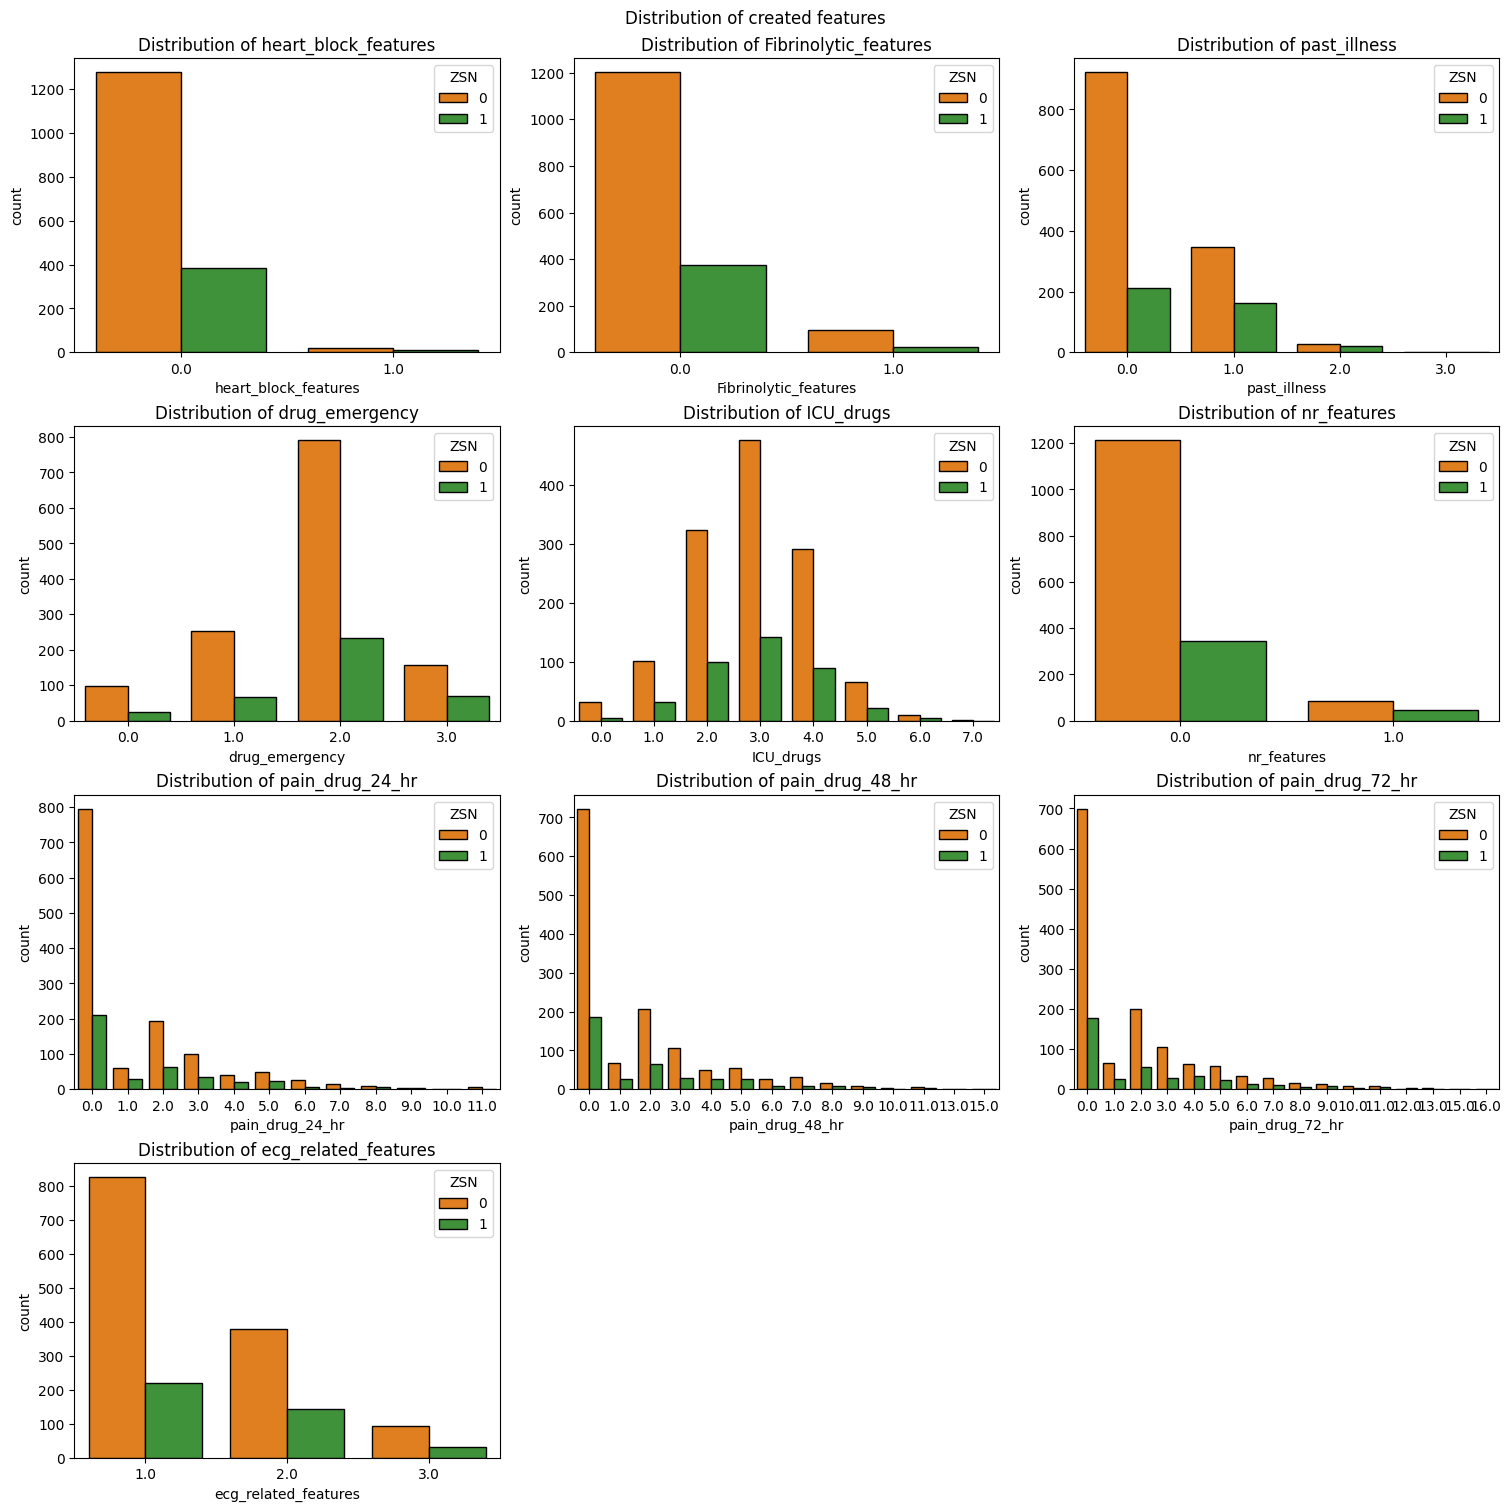

In [34]:
#plot Newly created features
new_feat_list = ["heart_block_features","Fibrinolytic_features","past_illness","drug_emergency","ICU_drugs",
                 "nr_features","pain_drug_24_hr","pain_drug_48_hr","pain_drug_72_hr","ecg_related_features"]
fig = plt.figure(layout="constrained", figsize=(15,15))
gs = GridSpec(4,3,figure=fig) 

plot=0 #to select the feature name in the list of categorical features
for i in range(0,4): #to generate column numbers
  for j in range(0,3): #row generate row numbers
    if plot < 10:
      ax_=fig.add_subplot(gs[i,j]) #assign axes object at the current row and column
      sns.countplot(x=X_2[new_feat_list].loc[:,new_feat_list[plot]],hue=Y,edgecolor="black", palette="Paired_r",ax=ax_)
      ax_.set_title(f"Distribution of {new_feat_list[plot]}")
      plot = plot+1 #increase count of plot
fig.suptitle("Distribution of created features") #figure title
plt.show()

In [35]:
#List of added up features to drop
new_features_parts = ecg_features_list + heart_block_features+Fibrinolytic_features+past_illness+drug_emergency+ICU_drugs+nr_features+pain_drug_24_hr+pain_drug_48_hr+pain_drug_72_hr

#compute the MI score of the train set
mi_score = mutual_info_classif(X_2,Y)
#create a series from the mi_scores using the columns as index
mi_score = pd.Series(mi_score, index = X_2.columns, name="mi_score")

mi_score.sort_values(ascending=False).head(20)

ZSN_A              0.059271
ritm_ecg_p_04      0.028148
MP_TP_POST         0.025061
zab_leg_01         0.022763
R_AB_3_n           0.020017
AST_BLOOD          0.019656
n_r_ecg_p_01       0.017828
n_p_ecg_p_11       0.016563
LID_S_n            0.016125
zab_leg_04         0.016113
IBS_POST           0.015796
n_p_ecg_p_12       0.015544
zab_leg_06         0.015333
L_BLOOD            0.015124
B_BLOK_S_n         0.014688
pain_drug_72_hr    0.013966
D_AD_ORIT          0.013774
pain_drug_48_hr    0.013451
IM_PG_P            0.012975
fibr_ter_07        0.012885
Name: mi_score, dtype: float64

Some of the newly created features can be seen as informative in the above list

<h2 style = "text-align:center"> MODEL DEVELOPMENT</h2>

FUNCTIONS FOR SCORING THE MODEL AND KFOLD EVALUATION USING CROSS VALIDATION

In [82]:

#Model prediction function
def score_model_prediction(estimator,X_train_,Y_train_, X_test_, Y_test_, grid=False):
    
    if grid==True:
        print("in here")
        #if gridsearch is true, then use the grid search object for prediction
        y_pred = estimator.predict(X_test_)
    else:
        #this means prediction will be made directly from estimator, hence fit and predict. 
        estimator.fit(X_train_,Y_train_)
        y_pred = estimator.predict(X_test_)
    #print classification score
    print("======classification report======")
    class_report = classification_report(y_pred, Y_test_)
    print(class_report)

    #create axes to plot ROC and confusion matrix
    fig, axs = plt.subplots(1,3,figsize=(20,6))
    #plot confusion matrix of the values
    con_matrix= (confusion_matrix(Y_test_,y_pred, labels=estimator.classes_))
    con_disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=estimator.classes_)
    con_disp.plot(cmap="Blues_r", ax=axs[0])

    #plot Receiver Operator Curve
    RocCurveDisplay.from_predictions(Y_test_,y_pred, ax=axs[1])
    
    #precision_recall curve
    PrecisionRecallDisplay.from_predictions(Y_test, y_pred, ax=axs[2])
    plt.show()
    
    return y_pred, class_report, con_disp


#function for cross validation with or without applying sampling in the pipeline
def cross_val(estimator_,X_train_,Y_train_, smote=False):
    
    #A dictionary of custom scores to pass to the cross validation function.
    scoring_ = {
    "f1_micro":"f1_micro",
    "precision": "precision",
    "recall": "recall",
    "accuracy": "accuracy",
    "ROCAUC": "roc_auc"
    }
    pipeline = Pipeline(steps = [["smote", SMOTE(random_state=42)], #Sample the train set of each fold 
                             ["scaler", MinMaxScaler()], #Normalize with the MinMax.
                             ["classifier", estimator_]])
    
    if smote ==True :
        #if the smote is true, use the pipeline with sampling
        cv_score = cross_validate(pipeline, X_train_, Y_train_, scoring=scoring_, cv=5)
        cv_score=pd.DataFrame(cv_score)
        return cv_score
    else:
        
        cv_score = cross_validate(estimator_, X_train_, Y_train_, scoring=scoring_, cv=5)
        cv_score=pd.DataFrame(cv_score)
        return cv_score

    

DISTRIBUTION OF THE TARGET COLUMN

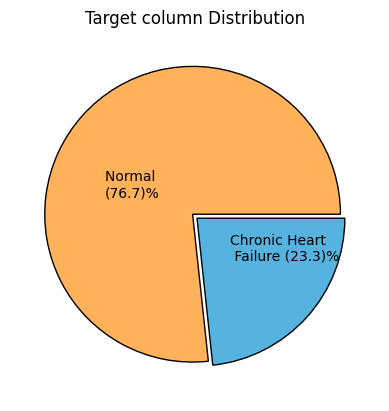

In [104]:
#Calculate percentage of distribution
percent_no_Y = round(((Y.value_counts()[0]*100)/len(Y)),1)
percent_yes_Y = round(((Y.value_counts()[1]*100)/len(Y)),1)

#Visualize Distribution of the Attrition Colums
#piechart
plt.pie([percent_no_Y,percent_yes_Y], labels=[f"Normal \n({percent_no_Y})%",f"Chronic Heart \n Failure ({percent_yes_Y})%"], labeldistance=0.3,
       wedgeprops={"ec":"black"}, colors=["#FFB25A","#56B3E0"], explode=[0.02,0.02])
plt.title("Target column Distribution")
plt.show()

Create new split from selected features

In [157]:
#sort the list of features in MI from ascending and the first 43 column names as a list
best_feat= list(mi_score.sort_values(ascending=False).index)
best_feat = [name for index,name in enumerate(best_feat) if index<20 ]

#split Data into train and test set
X_train, X_test, Y_train_2 , Y_test = train_test_split(X_2,Y,test_size=0.3, random_state=41, stratify=Y)

#THESE VARIABLES WILL BE USED FOR THE CROSS VAL AS THE SMOTE AND NORMALIZATION OBJECTS WILL BE ADDED IN THE PIPELINE TO REFLECT TRUE GENERALIZATION
X_train_2 = X_train[best_feat] #THIS VARIABLES WILL BE PASSED TO THE GRID FUNCTION FOR MODEL OPTIMIZATION
X_test_2 = X_test[best_feat]


#THESE VARIABLES ARE USED FOR DIRECTY SCORING THE MODEL ON THE TEST SET 
#resample train set
X_2_sampled,Y_2_sampled = SMOTE(random_state=42).fit_resample(X_train_2,Y_train_2) 
mm_3 = MinMaxScaler()
mm_3.fit(X_train_2)
X_train_2_t = mm_3.transform(X_2_sampled)
X_test_2_t = mm_3.transform(X_test_2) #THIS VARIABLE WILL BE USED FOR SCORING THE MODEL


<h4 style="font-weight:bold"> SVM</h4>

Use K-FOLD split to check performance on the train set.

In [37]:
svc_3 = SVC()
cv_svc_3 = cross_val(svc_3, X_train_2,Y_train_2, smote=True)
cv_svc_3.head()

,fit_time,score_time,test_f1_micro,test_precision,test_recall,test_accuracy,test_ROCAUC
0,0.092655,0.042456,0.759494,0.478261,0.400000,0.759494,0.683916
1,0.094613,0.043310,0.767932,0.500000,0.418182,0.767932,0.696204
2,0.094602,0.042378,0.767932,0.512821,0.357143,0.767932,0.660813
3,0.090507,0.042000,0.745763,0.435897,0.309091,0.745763,0.629332
4,0.091619,0.069052,0.788136,0.586207,0.309091,0.788136,0.689804


Evaluate the model performance with the held out set 

======classification report======
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       418
           1       0.36      0.48      0.41        90

    accuracy                           0.76       508
   macro avg       0.62      0.65      0.63       508
weighted avg       0.79      0.76      0.77       508



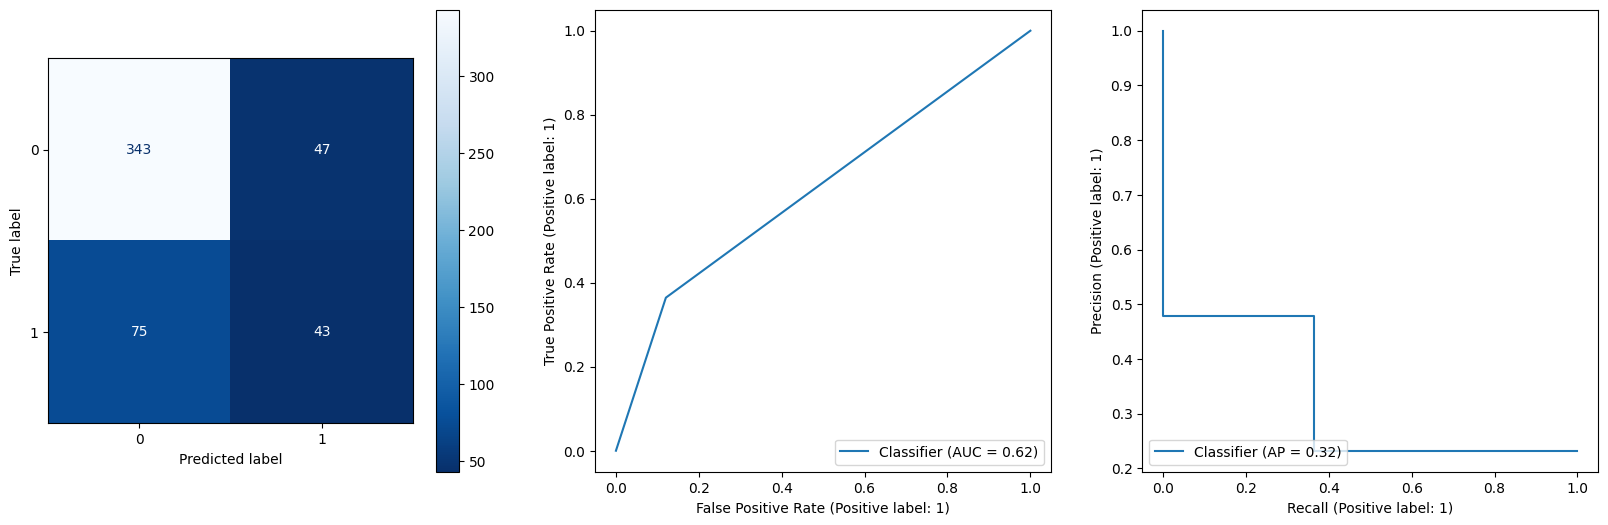

In [39]:
y_pred_svc_3, class_rep_svc_3, con_disp_svc_3 = score_model_prediction(svc_3,X_train_2_t, Y_2_sampled, X_test_2_t, Y_test)

<h4 style="font-weight:bold"> LOGISTIC REGRESSION</h4>

Use K-FOLD split to check performance on the train set.

In [40]:
log_3 = LogisticRegression()
cv_log_3 = cross_val(log_3, X_train_2,Y_train_2, smote=True)
cv_log_3.head()

,fit_time,score_time,test_f1_micro,test_precision,test_recall,test_accuracy,test_ROCAUC
0,0.041903,0.021351,0.696203,0.397590,0.600000,0.696203,0.684815
1,0.035566,0.018416,0.632911,0.329787,0.563636,0.632911,0.616583
2,0.034861,0.018229,0.675105,0.376471,0.571429,0.675105,0.663181
3,0.032173,0.019094,0.699153,0.378788,0.454545,0.699153,0.652135
4,0.038617,0.018275,0.699153,0.385714,0.490909,0.699153,0.653842


Evaluate the model performance with the held out set 

======classification report======
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       332
           1       0.56      0.38      0.45       176

    accuracy                           0.68       508
   macro avg       0.64      0.61      0.61       508
weighted avg       0.66      0.68      0.66       508



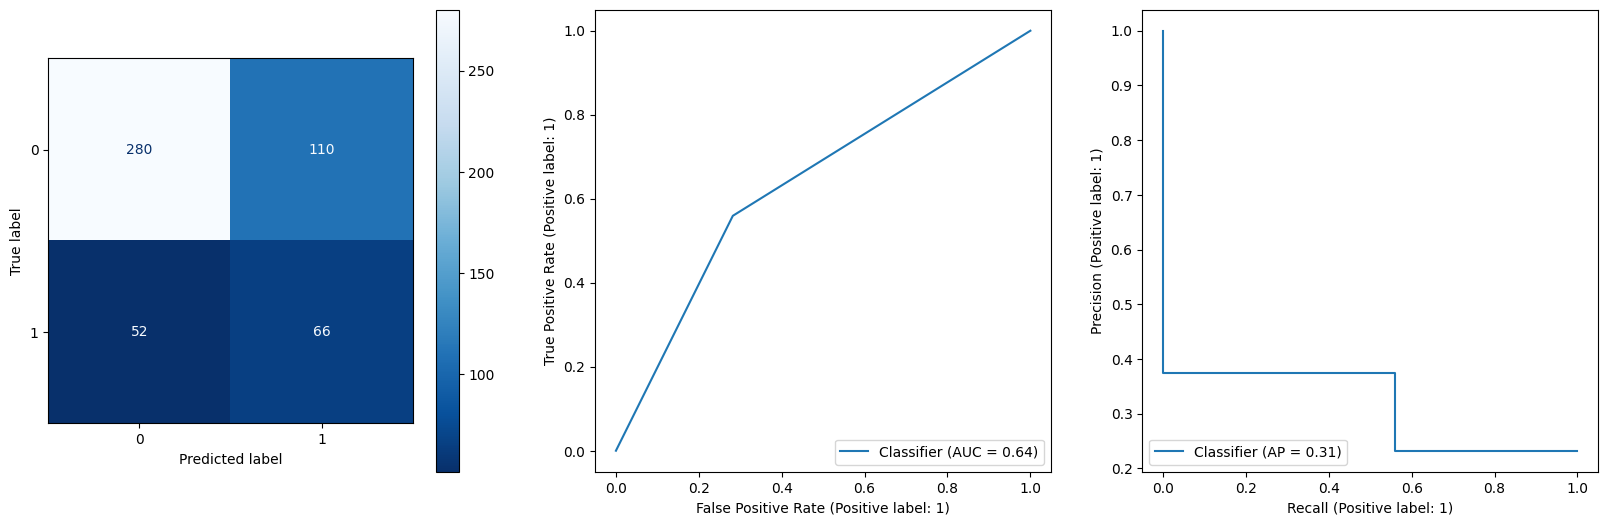

In [41]:
#Logistic Regression
y_pred_log_3, class_rep_log_3, con_disp_log_3 = score_model_prediction(log_3,X_train_2_t, Y_2_sampled, X_test_2_t, Y_test)

<h4 style="font-weight:bold"> DECISION TREE</h4>

Use K-FOLD split to check performance on the train set.

In [42]:
#apply the sample weight to address the class imbalance
dec_3 = DecisionTreeClassifier()
cv_dec_3 = cross_val(dec_3, X_train_2,Y_train_2, smote=True)
cv_dec_3.head()

,fit_time,score_time,test_f1_micro,test_precision,test_recall,test_accuracy,test_ROCAUC
0,0.029741,0.014224,0.746835,0.459016,0.509091,0.746835,0.669980
1,0.024087,0.012812,0.670886,0.311475,0.345455,0.670886,0.557343
2,0.021553,0.012989,0.713080,0.396552,0.410714,0.713080,0.605416
3,0.022498,0.014173,0.682203,0.327586,0.345455,0.682203,0.564992
4,0.024310,0.015539,0.754237,0.470588,0.436364,0.754237,0.643596


Evaluate the model performance with the held out set 

======classification report======
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       371
           1       0.38      0.33      0.35       137

    accuracy                           0.68       508
   macro avg       0.57      0.57      0.57       508
weighted avg       0.66      0.68      0.67       508



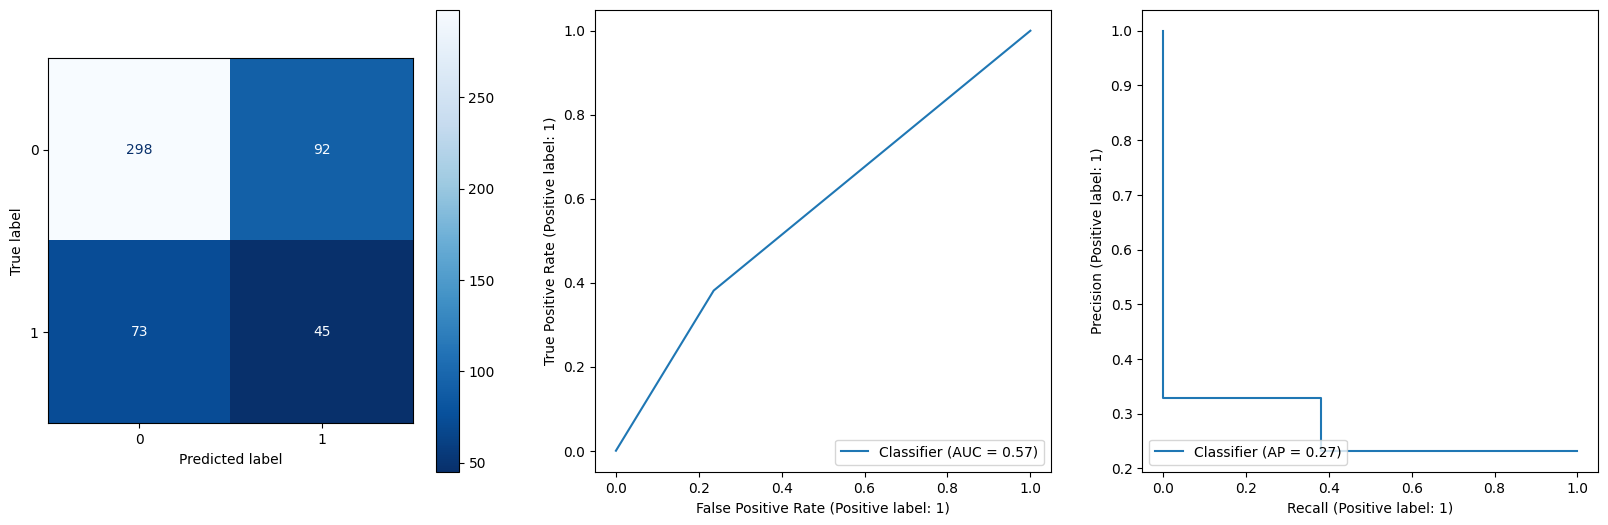

In [44]:
y_pred_dec_3, class_rep_dec_3, con_disp_dec_3 = score_model_prediction(dec_3,X_train_2_t, Y_2_sampled, X_test_2_t, Y_test)

<h4 style="font-weight:bold"> RANDOM FOREST</h4>

Use K-FOLD split to check performance on the train set.

In [45]:
ran_3 = RandomForestClassifier()
cv_ran_3 = cross_val(ran_3, X_train_2,Y_train_2, smote=True)
cv_ran_3.head()

,fit_time,score_time,test_f1_micro,test_precision,test_recall,test_accuracy,test_ROCAUC
0,0.324843,0.031204,0.784810,0.555556,0.363636,0.784810,0.688462
1,0.314781,0.030875,0.780591,0.531915,0.454545,0.780591,0.709291
2,0.307162,0.030495,0.759494,0.485714,0.303571,0.759494,0.654597
3,0.314292,0.032909,0.775424,0.533333,0.290909,0.775424,0.660271
4,0.317109,0.030754,0.805085,0.645161,0.363636,0.805085,0.724058


Evaluate the model performance with the held out set 

======classification report======
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       424
           1       0.28      0.39      0.33        84

    accuracy                           0.73       508
   macro avg       0.57      0.60      0.58       508
weighted avg       0.77      0.73      0.75       508



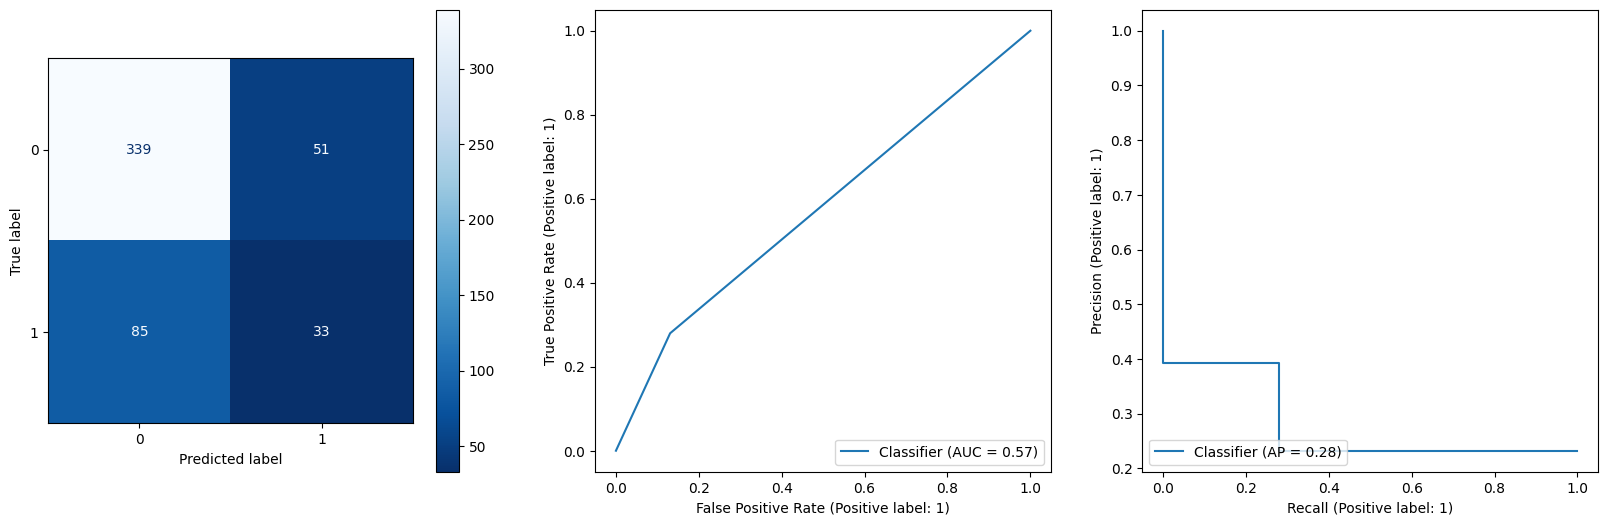

In [46]:
y_pred_ran_3, class_rep_ran_3, con_disp_ran_3 = score_model_prediction(ran_3,X_train_2_t, Y_2_sampled, X_test_2_t, Y_test)

<h2 style = "text-align:center"> MODEL OPTIMIZATION </h2>

In the model parameter search, the main focus will be on the parameters that best increases the Positive rates and maximizes the recall of Chronic Heart Failure Prediction. The balance will be the positive rates and recall.

In [61]:
def grid_search_tune(estimator_, params, X_train_, Y_train_):
    #pipepline to pass to the grid search
    pipeline = Pipeline(steps = [["smote", SMOTE(random_state=42)], #apply random sampling to train sets
                             ["scaler", MinMaxScaler()], #Normalize with the MinMax.
                             ["classifier", estimator_]])
    g_cv = GridSearchCV(estimator = pipeline, param_grid = params, scoring = "accuracy", cv=5)
    
    g_cv.fit(X_train_,Y_train_)
    #print best parameter
    print("======best parameters=====")
    print(g_cv.best_params_)
    print("======best score=====")
    print(g_cv.best_score_)
    return g_cv

<h4 style="font-weight:bold"> SVM</h4>

In [62]:
svc_2 =SVC()
# dictionary of hyperparameter search space
params_svc = {
    "classifier__gamma": [0.01,0.1,1,10],
    "classifier__C":[0.01, 0.1,1,10],
    "classifier__kernel":["linear","poly","rbf"]
}
svc_cv = grid_search_tune(svc_2, params_svc,X_train_2, Y_train_2)

======best parameters=====
{'classifier__C': 10, 'classifier__gamma': 1, 'classifier__kernel': 'rbf'}
======best score=====
0.7760173067296002


======classification report======
              precision    recall  f1-score   support

           0       0.87      0.80      0.83       425
           1       0.28      0.40      0.33        83

    accuracy                           0.73       508
   macro avg       0.58      0.60      0.58       508
weighted avg       0.78      0.73      0.75       508



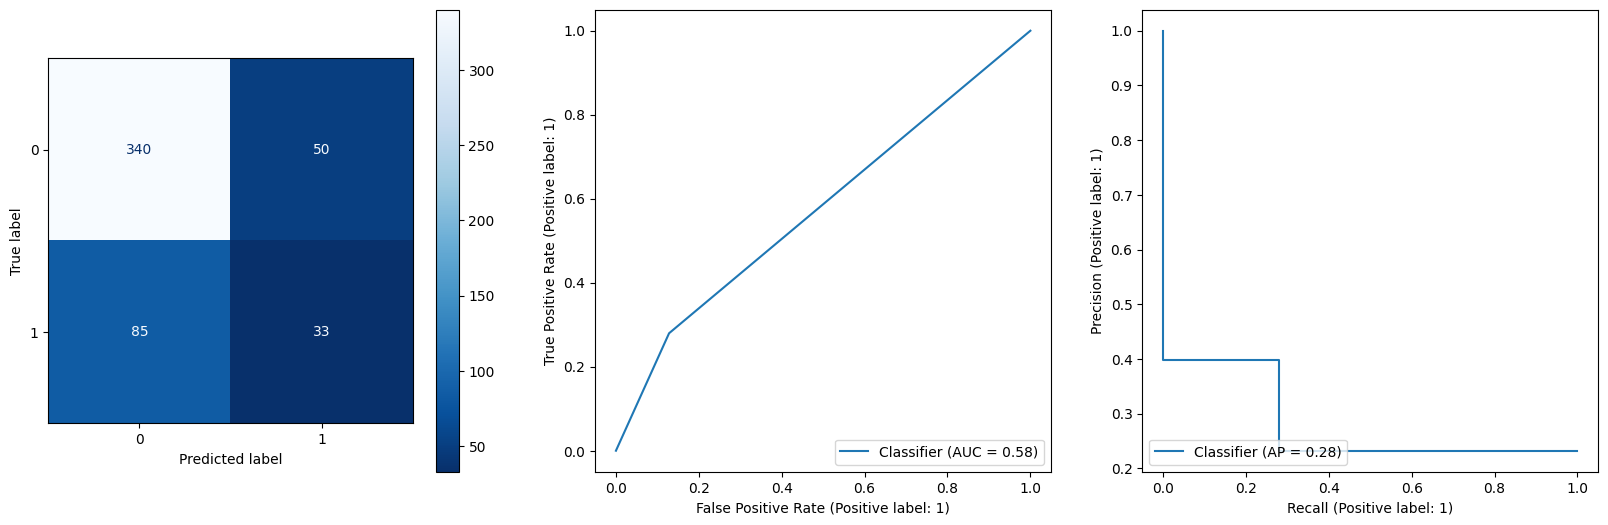

In [130]:
#Score model with the grid parameter
svc_2 =SVC(C=10, gamma=1, kernel="rbf")
y_pred_svc_2, class_rep_svc_2, con_disp_svc_2 = score_model_prediction(svc_2, X_train_2_t, Y_2_sampled, X_test_2_t, Y_test)

In [66]:
svc_cv_df = pd.DataFrame(svc_cv.cv_results_)
svc_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__gamma,param_classifier__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.085992,0.012027,0.012218,0.000358,0.01,0.01,linear,"{'classifier__C': 0.01, 'classifier__gamma': 0...",0.742616,0.607595,0.573840,0.716102,0.728814,0.673793,0.069176,35
1,0.090453,0.001857,0.013504,0.000643,0.01,0.01,poly,"{'classifier__C': 0.01, 'classifier__gamma': 0...",0.755274,0.751055,0.729958,0.754237,0.766949,0.751495,0.012039,8
2,0.109816,0.000615,0.042482,0.000322,0.01,0.01,rbf,"{'classifier__C': 0.01, 'classifier__gamma': 0...",0.738397,0.611814,0.573840,0.707627,0.733051,0.672946,0.067318,39
3,0.081767,0.003810,0.012297,0.000374,0.01,0.1,linear,"{'classifier__C': 0.01, 'classifier__gamma': 0...",0.742616,0.607595,0.573840,0.716102,0.728814,0.673793,0.069176,35
4,0.089944,0.004775,0.012977,0.000054,0.01,0.1,poly,"{'classifier__C': 0.01, 'classifier__gamma': 0...",0.755274,0.751055,0.729958,0.754237,0.766949,0.751495,0.012039,8


<h4 style="font-weight:bold"> LOGISTIC REGRESSION</h4>

In [125]:
# Create Model Object
log_2 = LogisticRegression(random_state=42)

params_lr = {
    "classifier__C": [0.1,1,10],
    "classifier__penalty": ["l1","l2"],
}
lr_cv = grid_search_tune(log_2, params_lr, X_train_2, Y_train_2)
#score with the test set

======best parameters=====
{'classifier__C': 10, 'classifier__penalty': 'l2'}
======best score=====
0.6830436959164701


======classification report======
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       336
           1       0.55      0.38      0.45       172

    accuracy                           0.69       508
   macro avg       0.64      0.61      0.61       508
weighted avg       0.67      0.69      0.67       508



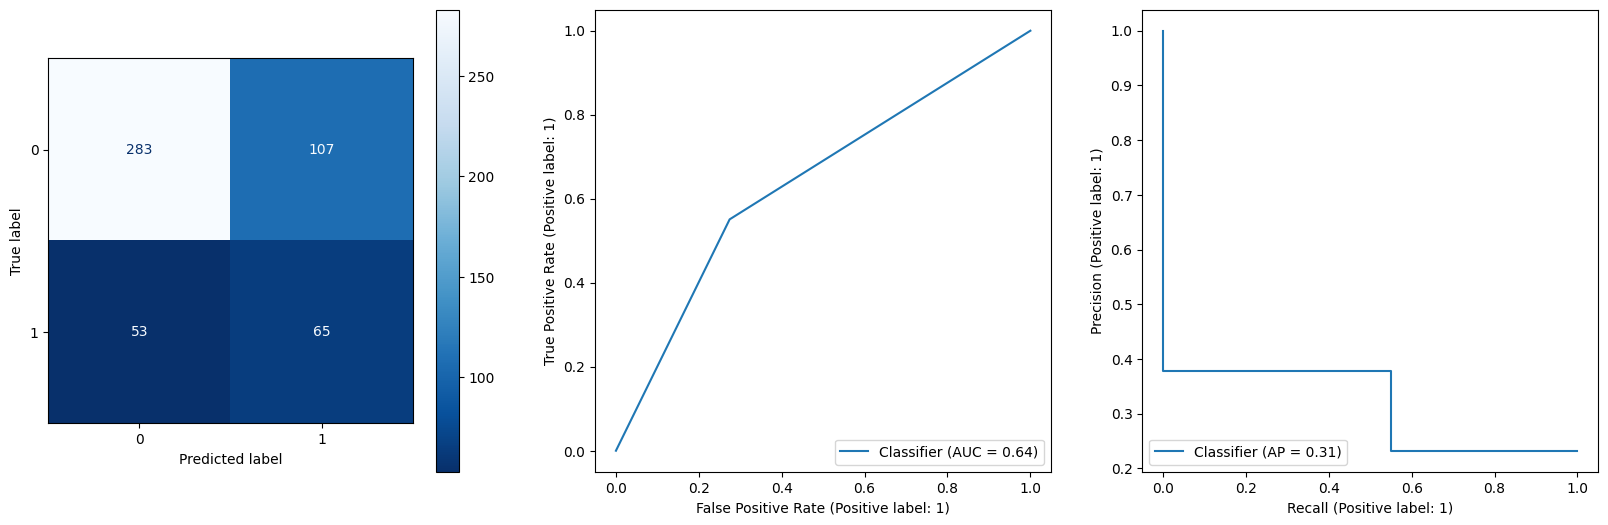

In [129]:
#score on test set using best parameters
log_2 = LogisticRegression(C=10, penalty="l2", random_state=42)
y_pred_lr_cv, class_rep_lr_cv, con_disp_lr_cv = score_model_prediction(log_2, X_train_2_t, Y_2_sampled, X_test_2_t, Y_test)

In [124]:
lr_cv_df = pd.DataFrame(lr_cv.cv_results_)
lr_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__multi_class,param_classifier__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016606,0.002813,0.000000,0.000000,0.1,ovr,l1,"{'classifier__C': 0.1, 'classifier__multi_clas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.068579,0.021094,0.004930,0.000137,0.1,ovr,l2,"{'classifier__C': 0.1, 'classifier__multi_clas...",0.691983,0.624473,0.632911,0.694915,0.724576,0.673772,0.038626,6
2,0.036249,0.022515,0.000000,0.000000,0.1,multinomial,l1,"{'classifier__C': 0.1, 'classifier__multi_clas...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.024571,0.001155,0.002771,0.000175,0.1,multinomial,l2,"{'classifier__C': 0.1, 'classifier__multi_clas...",0.700422,0.637131,0.649789,0.699153,0.720339,0.681367,0.032101,4
4,0.013382,0.000087,0.000000,0.000000,1,ovr,l1,"{'classifier__C': 1, 'classifier__multi_class'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


<h4 style="font-weight:bold"> DECISION TREE</h4>

In [119]:
dec_1=DecisionTreeClassifier(random_state=42)
# dictionary of hyperparameter search space
params_dc = {
    "classifier__criterion":["gini", "entropy"],
    "classifier__max_depth": range(3,10),
    "classifier__min_samples_leaf": range(1,5)
}
dec_1_cv = grid_search_tune(dec_1, params_dc, X_train_2, Y_train_2)

======best parameters=====
{'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__min_samples_leaf': 1}
======best score=====
0.7988271472502324


======classification report======
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       459
           1       0.25      0.59      0.35        49

    accuracy                           0.79       508
   macro avg       0.60      0.70      0.61       508
weighted avg       0.88      0.79      0.82       508



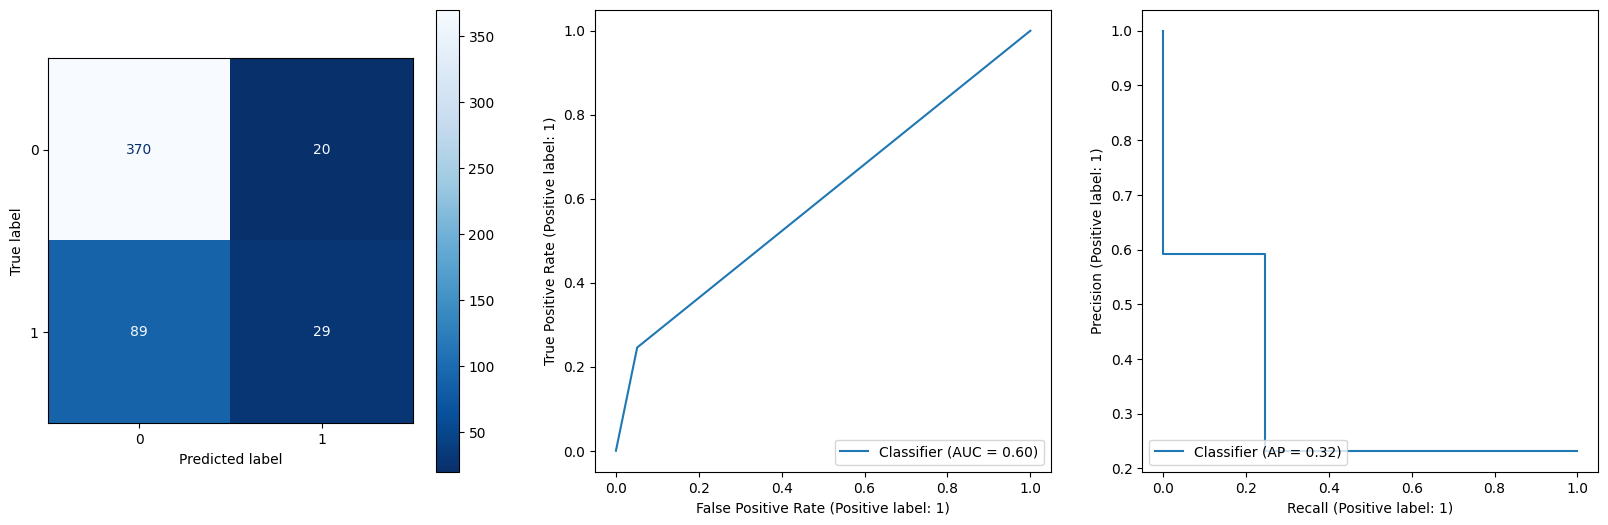

In [121]:
#score on test set using best parameters
dec_1 = DecisionTreeClassifier(criterion="gini", max_depth = 4, min_samples_leaf=1, random_state=42)
y_pred_dec_1, class_rep_dec_1, con_disp_dec_1 = score_model_prediction(dec_1,X_train_2_t, Y_2_sampled, X_test_2_t, Y_test)

In [122]:
dec_cv_df = pd.DataFrame(dec_1_cv.cv_results_)
dec_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020216,0.001754,0.002938,0.000088,gini,3,1,"{'classifier__criterion': 'gini', 'classifier_...",0.805907,0.784810,0.721519,0.792373,0.822034,0.785329,0.034329,9
1,0.018971,0.000581,0.002907,0.000207,gini,3,2,"{'classifier__criterion': 'gini', 'classifier_...",0.805907,0.784810,0.721519,0.792373,0.822034,0.785329,0.034329,9
2,0.018002,0.000790,0.002659,0.000144,gini,3,3,"{'classifier__criterion': 'gini', 'classifier_...",0.805907,0.789030,0.721519,0.792373,0.822034,0.786172,0.034357,7
3,0.017144,0.000828,0.002548,0.000072,gini,3,4,"{'classifier__criterion': 'gini', 'classifier_...",0.805907,0.789030,0.721519,0.792373,0.822034,0.786172,0.034357,7
4,0.017575,0.000385,0.002666,0.000161,gini,4,1,"{'classifier__criterion': 'gini', 'classifier_...",0.822785,0.822785,0.738397,0.792373,0.817797,0.798827,0.032253,1


<h4 style="font-weight:bold"> RANDOM FOREST</h4>

In [158]:
ran_2 = RandomForestClassifier(random_state=42)

params_rf = {
    "classifier__criterion":["gini", "entropy"],
    "classifier__max_depth": range(3,10),
    "classifier__min_samples_leaf": range(1,5),
    "classifier__n_estimators": range(50,500,50) #start search from 50 and end at 450, the increment is by 50, 50,100,150
}

ran_2_cv = grid_search_tune(ran_2, params_dc, X_train_2, Y_train_2)

======best parameters=====
{'classifier__criterion': 'entropy', 'classifier__max_depth': 9, 'classifier__min_samples_leaf': 2}
======best score=====
0.8022384323821783


======classification report======
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       428
           1       0.34      0.50      0.40        80

    accuracy                           0.77       508
   macro avg       0.62      0.66      0.63       508
weighted avg       0.81      0.77      0.78       508



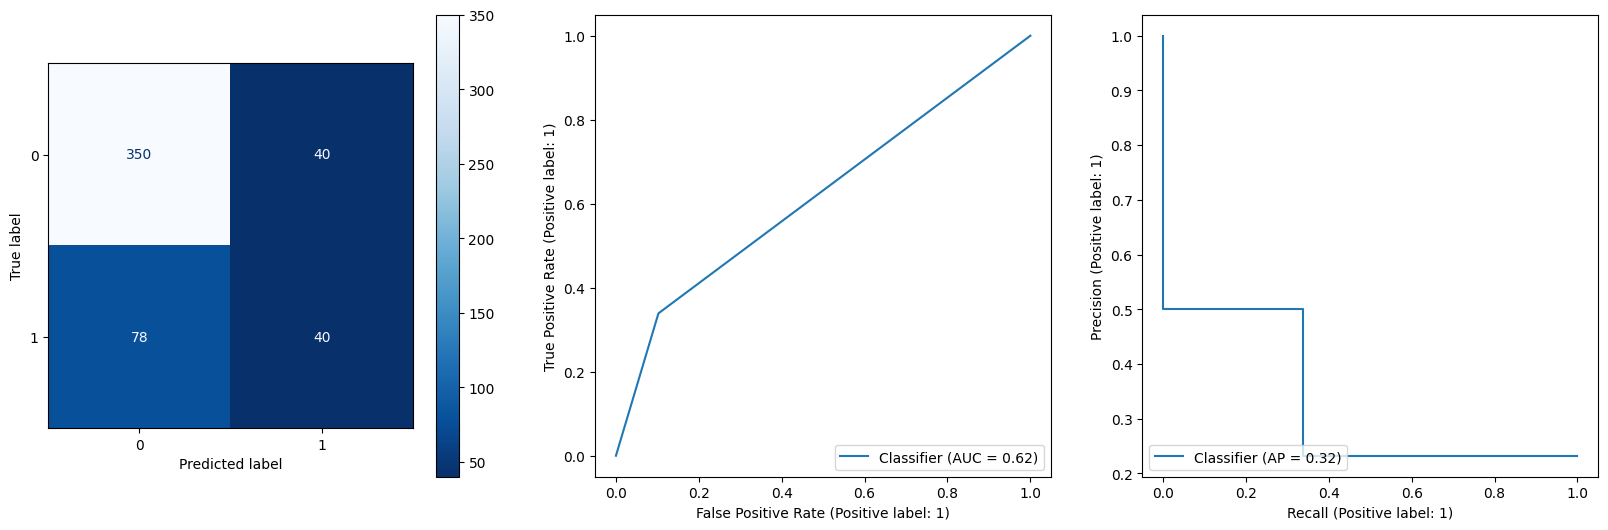

In [159]:
#score on test set using best parameters
ran_2 = RandomForestClassifier(criterion = "entropy", max_depth=9, min_samples_leaf =2, random_state=42)
y_pred_ran_2, class_rep_ran_2, con_disp_ran_2 = score_model_prediction(ran_2,X_train_2_t, Y_2_sampled, X_test_2_t, Y_test)

In [117]:
ran_cv_df = pd.DataFrame(ran_2_cv.cv_results_)
ran_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.278887,0.019059,0.011348,0.000794,gini,3,1,"{'classifier__criterion': 'gini', 'classifier_...",0.793249,0.763713,0.767932,0.792373,0.826271,0.788708,0.022367,52
1,0.256343,0.006108,0.010641,0.001339,gini,3,2,"{'classifier__criterion': 'gini', 'classifier_...",0.793249,0.763713,0.767932,0.796610,0.826271,0.789555,0.022569,44
2,0.243779,0.006025,0.010364,0.000815,gini,3,3,"{'classifier__criterion': 'gini', 'classifier_...",0.793249,0.759494,0.772152,0.800847,0.826271,0.790403,0.023204,39
3,0.265155,0.015964,0.011491,0.002210,gini,3,4,"{'classifier__criterion': 'gini', 'classifier_...",0.789030,0.759494,0.772152,0.800847,0.822034,0.788711,0.021843,49
4,0.311240,0.029278,0.012050,0.001481,gini,4,1,"{'classifier__criterion': 'gini', 'classifier_...",0.793249,0.763713,0.755274,0.796610,0.834746,0.788718,0.028090,47


<h2 style = "text-align:center"> MODEL EVALUATION</h2>

<h4 style="font-weight:bold"> COMPARISON OF ALL MODELS</h4>

In [131]:
#SUPPORT VECTOR MACHINE SCORES
svm_scores = {"accuracy":round(accuracy_score(Y_test_2, y_pred_svc_2),2),
              "recall":round(recall_score(Y_test_2, y_pred_svc_2, average="weighted"),2),
              "precision":round(precision_score(Y_test_2, y_pred_svc_2, average="weighted"),2),
              "f1-score":round(f1_score(Y_test_2, y_pred_svc_2, average="weighted"),2)}

#LOGISTIC REGRESSION SCORES
log_scores = {"accuracy":round(accuracy_score(Y_test_2, y_pred_lr_cv),2),
              "recall":round(recall_score(Y_test_2, y_pred_lr_cv, average="weighted"),2),
              "precision":round(precision_score(Y_test_2, y_pred_lr_cv, average="weighted"),2),
              "f1-score":round(f1_score(Y_test_2, y_pred_lr_cv, average="weighted"),2)}

#DECISION TREE SCORES
dec_scores =  {"accuracy":round(accuracy_score(Y_test_2, y_pred_dec_1),2),
              "recall":round(recall_score(Y_test_2, y_pred_dec_1, average="weighted"),2),
              "precision":round(precision_score(Y_test_2, y_pred_dec_1, average="weighted"),2),
              "f1-score":round(f1_score(Y_test_2, y_pred_dec_1, average="weighted"),2)}

#RANDOM FOREST SCORES
ran_scores = {"accuracy":round(accuracy_score(Y_test_2, y_pred_ran_2),2),
              "recall":round(recall_score(Y_test_2, y_pred_ran_2, average="weighted"),2),
              "precision":round(precision_score(Y_test_2, y_pred_ran_2, average="weighted"),2),
              "f1-score":round(f1_score(Y_test_2, y_pred_ran_2, average="weighted"),2)}

#Put all scores in a dataframe
scores = pd.DataFrame([svm_scores, log_scores, dec_scores, ran_scores], index=["SVM", "LOGISTIC REGRESSION","DECSION TREE","RANDOM FOREST"])
scores.head()

,accuracy,recall,precision,f1-score
SVM,0.73,0.73,0.71,0.72
LOGISTIC REGRESSION,0.69,0.69,0.73,0.70
DECSION TREE,0.79,0.79,0.76,0.75
RANDOM FOREST,0.77,0.77,0.74,0.75


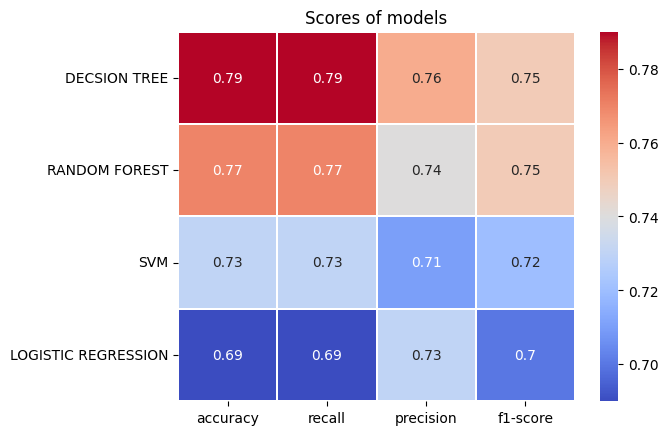

In [132]:
#create heat map of scores 
sns.heatmap(scores.sort_values(by="accuracy", ascending=False),annot=True, cmap="coolwarm", linewidth=0.1, linecolor="White")
plt.title("Scores of models")
plt.show()

Scores of all the models. Decision Tree and Random Forest provided the best scores in terms of accuracy, recall and support for the Chronic Heart Failure Class. However, Random Forest is the most desirable because it minimised the false negatives, and had more positive rates.

<h4 style="font-weight:bold"> FEATURE IMPORTANCE OF BEST FEATURE</h4>

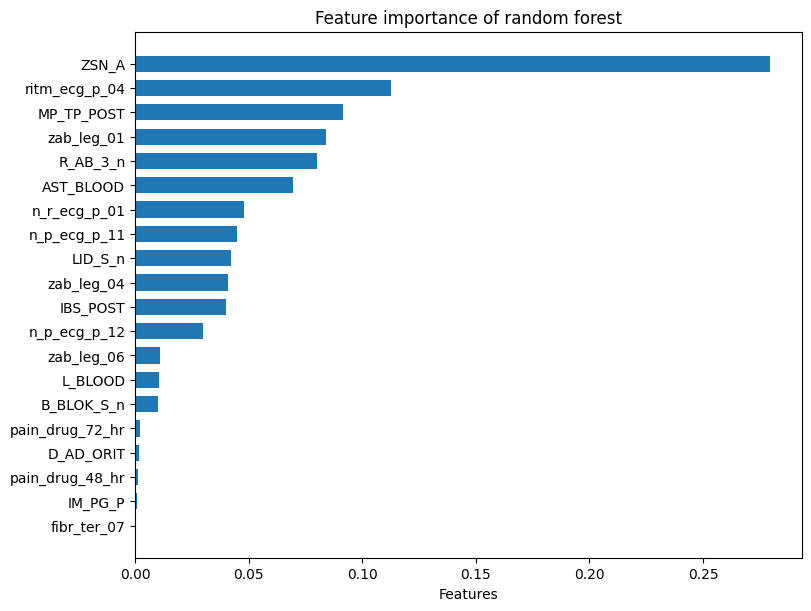

In [151]:
#create series from Random Forest importance
feature_importance = ran_2.feature_importances_
feature_importance = pd.Series(feature_importance, index=X_train_2.columns, name="Feature Importance")

#plot feature importance 
y=np.arange(0,len(feature_importance)*1.5,1.5) #create positions for the y ticks.
fig, ax = plt.subplots(layout="constrained",figsize=(8,6), dpi=100)
ax.barh(y,list(feature_importance.sort_values(ascending=False)),height=1, align="center")
ax.set_xlabel("Features")
ax.set_yticks(y, feature_importance.index)
ax.invert_yaxis()
ax.set_title("Feature importance of random forest")
plt.show()

It can be observed that the most important feature is history of previous chronic heart failure. 

<h4 style="font-weight:bold"> SHAP VALUES </h4>

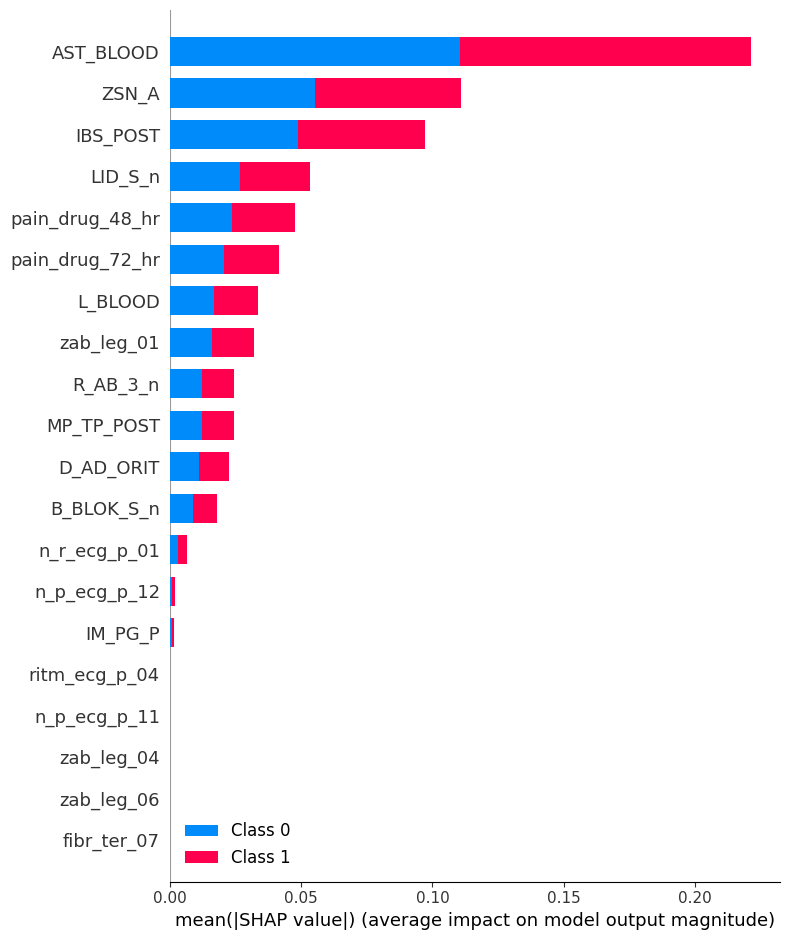

In [156]:
#convert scaled test set to data frame
test_df = pd.DataFrame(X_test_2_t, columns=X_test_2.columns)

ran_explainer = shap.TreeExplainer(ran_2, shap.sample(test_df, 1))
ran_shap_values = ran_explainer.shap_values(X_2_sampled)

#display
shap.summary_plot(ran_shap_values, test_df, plot_type="bar")


<h4 style="font-weight:bold"> BIAS ASSESSMENT USING APPROPRIATE FAIRNESS CRITERIA </h4>

The model bias towards the Sex Protected Attribute to see how the model make predictions towards the male and female class. The model was blinded to the sex attribute to reduce or mitigate against bias. Equal Accuraccy, Equal Precision and Equal Opportunity in terms of predicting Chronic Heart Failure will be used to check the fairness of the model. 

In [164]:
#get index of male and female class
m_indices = np.where(X_test["SEX"]==1)
f_indices = np.where(X_test["SEX"]==0)

#Actual target outcome
y_actual_m = [Y_test.values[i] for i in m_indices]
y_actual_f = [Y_test.values[i] for i in f_indices]

#Predicted outcome
y_pred_m = [y_pred_ran_2[i] for i in m_indices ]
y_pred_f = [y_pred_ran_2[i] for i in f_indices ]

#convert list to np array and flatten
y_pred_m = np.array(y_pred_m).ravel()
y_actual_m = np.array(y_actual_m).ravel()
y_pred_f = np.array(y_pred_f).ravel()
y_actual_f = np.array(y_actual_f).ravel()

#confusion matrix for male
cm_m = confusion_matrix(y_actual_m, y_pred_m)
disp_cm_m = ConfusionMatrixDisplay(cm_m, display_labels=ran_2.classes_)
tn_m, fp_m, fn_m, tp_m = cm_m.ravel()

#confusion matrix for female
cm_f = confusion_matrix(y_pred_f, y_actual_f)
disp_cm_f = ConfusionMatrixDisplay(cm_f, display_labels=ran_2.classes_)
tn_f, fp_f, fn_f, tp_f = cm_f.ravel()

#calculate performance metrics for male
accuracy_m = round(accuracy_score(y_actual_m, y_pred_m),2)
recall_m = round(recall_score(y_actual_m, y_pred_m),2)
positive_rate_m =  round((fp_m+tp_m)/(tn_m+fp_m+fn_m+tp_m),2)

#calculate performance metrics for female
accuracy_f = round(accuracy_score(y_actual_f, y_pred_f),2) 
recall_f = round(recall_score(y_actual_f, y_pred_f),2) 
positive_rate_f = round((fp_f+tp_f)/(tn_f+fp_f+fn_f+tp_f),2) 

#Create DataFrame of fairness criteria
fairness_criteria = pd.DataFrame([[accuracy_m,recall_m,positive_rate_m],[accuracy_f,recall_f,positive_rate_f]], 
                                       columns=["Equal Accuracy", "Equal Opportunity", "Group Fairness"], index=["male", "female"])
fairness_criteria.head()

,Equal Accuracy,Equal Opportunity,Group Fairness
male,0.79,0.36,0.15
female,0.73,0.31,0.26


Plot the confusion matrix of both classes

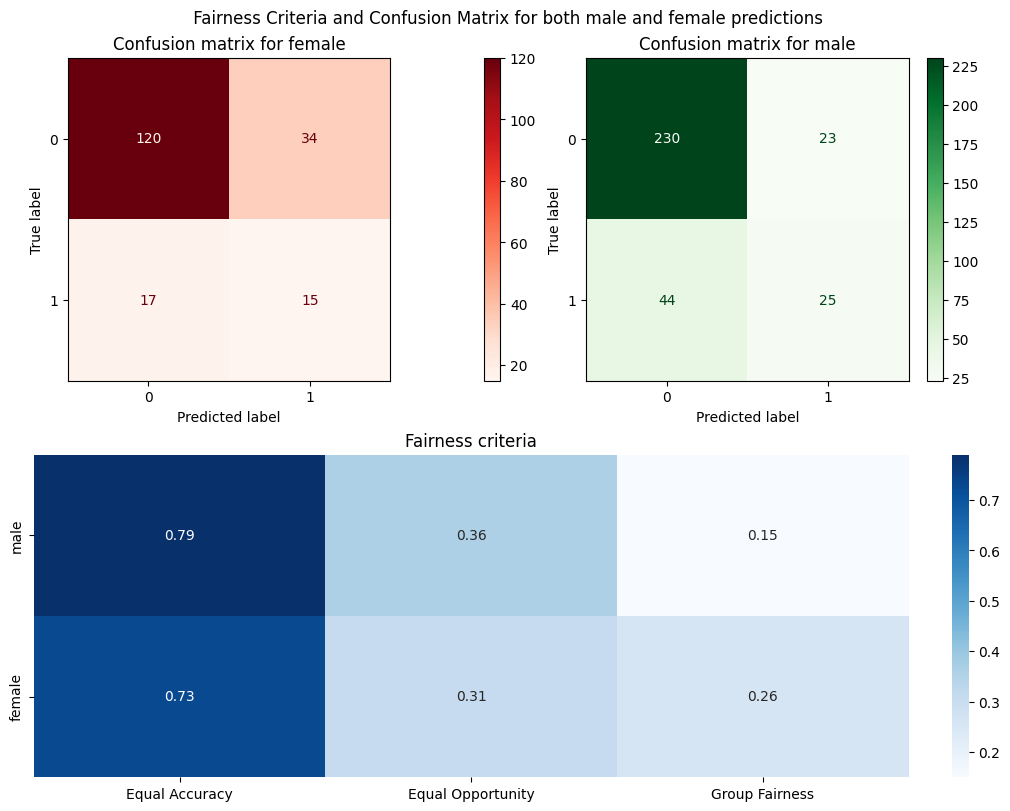

In [166]:
#Confusion Matrix for both male and female predictions.
fig = plt.figure(layout="constrained", figsize=(10,8))
gs = GridSpec(2,2,figure=fig)

#Confusion matrix for female predictions
disp_cm_f = ConfusionMatrixDisplay(cm_f, display_labels=ran_2.classes_)
ax1=fig.add_subplot(gs[0,0])
ax1.set_title("Confusion matrix for female")
disp_cm_f.plot(ax= ax1,  cmap="Reds")

    
#Confusion matrix for female predictions
disp_cm_m = ConfusionMatrixDisplay(cm_m, display_labels=ran_2.classes_)
ax2=fig.add_subplot(gs[0,1])
ax2.set_title("Confusion matrix for male")
disp_cm_m.plot(ax=ax2, cmap="Greens")

#Confusion Matrix to Display the Fairness Criteria
ax3=fig.add_subplot(gs[1,:])
sns.heatmap(fairness_criteria, annot = True, cmap="Blues", ax=ax3)
ax3.set_title("Fairness criteria")
fig.suptitle(" Fairness Criteria and Confusion Matrix for both male and female predictions")
plt.show()



It can be observed that the model does not have much bias towards the sex class, and this is because the SEX attribute was not included in the training of the model since it was not a high ranking feature according to MI,n blinding the model towards the SEX feature reduced bias